https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

## Table of Contents

### 1. Using Callbacks in Keras
### 2. Evaluating a Validation Dataset
### 3. Monitoring Model Performance
### 4. Early Stopping in Keras
### 5. Checkpointing in Keras
### 6. Early Stopping Case Study
#### 6.1. Binary Classification Problem
#### 6.2. Overfit Multilayer Perceptron
#### 6.3. Overfit MLP with Early Stopping - 1
#### 6.4. Overfit MLP with Early Stopping - 2, patience
#### 6.5. Overfit MLP with Early Stopping - 3, ModelCheckpoint

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Using Callbacks in Keras

Callbacks provide a way to execute code and interact with the training model process automatically.

Callbacks can be provided to the _fit()_ function.

Be careful : the argument *callbacks* should be fed with a *list*.
So we have to use square brackets.
That is, we can call mulitple options by listing them.

In this article, we primarily make use of *early stopping*.
We also use *ModelCheckPoint*.
Yet, there exist another callbacks such as *TensorBoard*, and furthermore, we can customize one for our tastes.

see https://keras.io/api/callbacks.

# 2. Evaluating a Validation Dataset

There are two ways of assigning the validation sets
```python
model.fit(train_X, train_y, validation_data=(val_x, val_y))
```
```python
model.fit(train_X, train_y, validation_split=0.3)
```
In the former case, we need all types of datasets : training sets, test sets and validation sets.

In the latter case, we only need training sets and test sets.
We make use of test sets to produce new test sets and validation sets by specifying the ratio of them.

# 3. Monitoring Model Performance

After specifying the validation sets, the loss on the validation dataset will be made available via the name *val_loss*.
By a 'metric', we mean the following and the likes;
 - *loss*
 - *val_loss*
 - *accuaracy*
 - *val_accuracy*
 - *mse*
 - *val_mse*
 
We moniter them to check the model performances

*loss*, *accuaracy* and *mse* are for testsets, while *val_loss*, *val_accuracy* and *val_mse* are for validation sets.
*accuracy* and *val_accuracy* make sense only for the classification, while *mse* and *val_mse* are meaningful only for regression.
By adding metrics to the 'model.compile' line, the value of the metrics are displayed for each epoch if we set *verbose=1*.
We can add a metric as follows;
```python
model.compile(..., metrics=['accuracy'])
```

# 4. Early Stopping in Keras

While training a model, one needs to stop the training process at some point to avoid overfitting.
Keras supports a callback called _Early Stopping_ for doing this.

This callback allows you to specify, so called, the trigger.
Once triggered, *early stopping* will stop the training process.

Here is an example of using the *early stopping* in a classification problem.
```python
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
```
In this setting, the model is going to pay attention to the metric *val_loss*.
Recall that we wish to minimize the value of the loss function.
That's why we set *mode* to be 'min'.
To discover the training epoch on which training was stopped, the *verbose* argument is set to 1.

If we are dealing with a regression problem, we may declare like this;
```python
es = EarlyStopping(monitor='val_accuaracy', mode='max', verbose=1)

```
The train procedure will stop at the point where the *val_loss* fail to decrease.
But this condition seems too strict.
We can mitigate this condition by being patient;
```python
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
```
Now we allow up to 50 times of increase.

There are two other ways of early stopping, different from the former.

(1) *min_delta*

Instead of whether the metric increases or decrease, we can monitor the absolute value of the increment.
For example, we may conclude that training precedure is not required anymore if the difference of consecutive values of *val_loss* is less than, say, 0.1.
```python
es = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.1)
```
Note that in the real line, a sequence is convergent if it is a Cauchy sequence.

(2) *baseline*

Finally, it may be desirable to only stop training if performance stays above or below a given threshold or baseline.
We may well be satisfied if the value of *val_loss* becomes less than, say, 0.4.

```python
es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)
```

# 5. Checkpointing in Keras

Early stopping with *patience* is an efficient tool for finding the best time to stop training.
Yet, *patience* is also a hyperparameter we have to specify.
And the model only with early stopping and *patience* may not be the best model.

An additional callback called *ModelCheckpoint* is available to save the best model observed during training.
This callback requires that HDF5 support has been installed on your workstation.

(wikipedia : Hierachical Data Format, 시작)

Hierarchical Data Format (HDF) is a set of file formats (HDF4, HDF5) designed to store and organize large amounts of data. Originally developed at the National Center for Supercomputing Applications, it is supported by The HDF Group, a non-profit corporation whose mission is to ensure continued development of HDF5 technologies and the continued accessibility of data stored in HDF.

(wikipedia : Hierachical Data Format, 끝)

We can use pip installer to get the required package ; 
```python
sudo pip install h5py
```
We can specify a callback by the name of 'mc' as follows
```python
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
```
We shall keep track of the value of *val_accuracy* which we will maximize and save the best model as a file named 'best_model.h5'.

The saved model can be loaded and evaluated by calling *load_model()* function.
```python
# load a saved model
from keras.models import load_model
saved_model = load_model('best_model.h5')
```

# 6. Early Stopping Case Study

## 6.1. Binary Classification Problem

이 문제에 대해서는 linear separability에 대한 이야기를 할 수 있다.

literal한 의미의 linear separation은, 고등학교 1학년에서 배우는 '부등식의 영역'과 관련되어 (single layer) perceptron의 classification의 문제를 설명할 수 있다.
activation function을 (보통 classification에서 하듯이) sigmoid 함수로 주면 이것은 정확히 부등식의 영역 문제 (ax+by+c>0, linear inequality)와 연관된다.
따라서 [5]번 셀의 그림의 파란 점과 빨간 점을 직선 하나로 나눌 수 있는 문제와 정확히 대응될 것이다.

조금 더 복잡한 model들에서는, 이 classification 문제가 linear 하지 않다.
즉 linear inequality를 수반하지 않는다.

아래에서 시도해볼 model이 위의 예와 다른 점은, 위의 예는 간단한 sigle-layer perceptron(abbreviated and refered to SLP)이었다면, 아래의 예는 조금 더 복잡한(사실은 한단계 더 복잡한, 그러니까 그 이상으로 복잡하지는 않은) multi-layer perceptron(abbreviated and refered to MLP)이라는 것이다.
MLP에서는 한 개의 hidden layer가 더 추가되었고 이 hidden layer에는 500개의 node들이 존재한다.

MLP에서는 두 가지 점에서 SLP와 다를 것이다.
첫째로 parameter의 개수가 다르다.
SLP에서는 2차원의 input=($x_1$,$x_2$)과 두 개의 weights$(w_1, w_2)$, 한 개의 bias($b$)가 존재했었다.
$$\text{input}=x_1,x_2$$
$$\text{parameters}=w_1, w_2, b.$$
MLP에서는 input의 모양은 같지만 parameter의 개수가 훨씬 더 많다.
input layer에서 hidden layer로 넘어갈 때 $2\times 500=1000$개의 weight들 $w_{ij}$과 500개의 bias $b_j$들이 있다.
또한 hidden layer에서 output layer로 넘어갈 때에는 500개의 weight들 $v_j$들과 1개의 bias $c$가 있다.
($i\in\{1,2\}$, $j\in\{1,2,\cdots,500\}$)
$$\text{input}=x_1,x_2,$$
$$\text{parameters}=w_{ij},b_j,v_j,c$$
$$\text{where}\quad i\in\{1,2\},\: j\in\{1,2,\cdots,500\}$$
결국 총 2001개의 parameter가 존재한다. 위의 SLP에서 단 3개의 parameter가 존재했던 것보다 훨씬 많은 수치이다.

둘째로, activation function이 적용되는 방식과 횟수가 다르다.
여기에서 activation function이란 sigmoid이다.

SLP에서는 단 한 번 activation function이 적용된다.
아주 간단한 식으로 표현될 것이다.
$$y=\sigma(w_1x_1+w_2x_2+b).\tag{1}$$
hidden layer에 도착해서 한 번, output layer에 도착해서 한 번, 총 두 차례에 걸쳐서 activation function이 적용된다.
input layer의 2차원 벡터 $(x_1,x_2)$가 hidden layer에 도달하면
$$h_1=\sigma(w_{11}x_1+w_{21}x_2+b_1)$$
$$\vdots$$
$$h_{500}=\sigma(w_{1,500}x_1+w_{2,500}x_2+b_{500}).$$
와 같이 되고, 이 500차원 벡터 $(h_1,\cdots,h_{500})$이 output layer에 도달하면
$$y=\sigma(v_1h_1+\cdots+v_{500}h_{500}+c).$$
가 된다.
따라서 sigmoid는 총 501번 적용되는 셈이다.
이 모든 식을 단 하나의 식으로 표현하면
$$y=\sigma(v_1\sigma(w_{11}x_1+w_{21}x_2+b_1)+\cdots+v_{500}\sigma(w_{1,500}x_1+w_{2,500}x_2+b_{500})+c).\tag{2}$$
이다.

SLP가 정확히 linear separation 문제가 되는 까닭은 (1)번 식에서 $y>0.5$일 필요충분조건이
$$w_1x_1+w_2x_2+b>0\tag{3}$$
이고, $w_1x_1+w_2x_2+b=0$이 2차원 평면에서의 직선을 의미하기 때문이다.

MLP에서는 다르다. (2)번 식에서 $y>0.5$일 필요충분조건은
$$v_1\sigma(w_{11}x_1+w_{21}x_2+b_1)+\cdots+v_{500}\sigma(w_{1,500}x_1+w_{2,500}x_2+b_{500})+c>0\tag{4}$$
인 것이다.
그 경계가 되는 식 ((4)번 식에서 =0인 것)은, 500을 2로 바꾼다고 할지라도
$$\frac{v_1}{1+e^{-w_{11}x_1-w_{21}x_2-b_1}}+\frac{v_2}{1+e^{-w_{12}x_1-w_{22}x_2-b_2}}+c=0\tag{5}$$
이 된다.
2차원 평면($x_1$, $x_2$를 변수로 하는 2차원 유클리드 공간)에 나타나는 (5)의 곡선은 당연히 직선이 아닐 것이고, 굉장히 복잡한 직선이 될 것이다.
따라서 MLP에서 이 문제는 linear separablitiy의 문제가 아니고, 특정한 클래스의 곡선을 가지고 separability를 생각하는 문제가 된다.

위에 쓴 SLP의 식 (3)과 그 내용을 보면 Papert와 Minsky가 "Perceptron(1969)"이라는 책을 통해 증명했다는 XOR problem의 문제는 그렇게 복잡한 문제는 아닌 것 같다.
 - https://en.wikipedia.org/wiki/Perceptrons_(book)
 
SLP | MLP
- | - 
![alt](SLP.png) | ![alt](MLP.png)

In [2]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

In [3]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [4]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df

,x,y,label
0,1.366982,-0.235416,1
1,1.764044,-0.345633,1
2,-0.378682,0.410044,0
3,1.151137,-0.135976,1
4,2.311683,0.322951,1
...,...,...,...
95,1.057190,-0.724467,1
96,0.538581,0.510492,0
97,0.657924,-1.034668,1
98,1.129963,0.708672,0


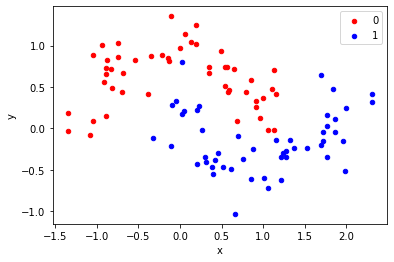

In [5]:
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

#### 6.1.1. Dataframe(dict())

[4]에서 아래와 같은 명령이 있었다. 그대로 시행해보면 복잡해보이는 어떤 dictionary 형태의 자료가 출력된다.

In [6]:
dict(x=X[:,0], y=X[:,1], label=y)

{'x': array([ 1.36698238,  1.76404402, -0.37868174,  1.15113747,  2.31168314,
         0.53866045, -0.93583639,  1.32563024,  0.75398022,  0.42764536,
         1.86426147, -0.83255618,  0.22507434,  0.21098847,  0.05359594,
        -0.14691002, -0.75060111, -0.91043983,  1.21265683,  0.64660318,
         0.68237381,  0.61031853,  1.99715631,  0.2077874 ,  0.35027414,
        -0.68407286,  1.76290471, -0.13029538, -1.34872432, -0.879935  ,
         0.69322932,  2.30858186, -0.32283333,  1.76628178,  1.86869763,
        -0.81925203, -1.07708794, -0.10935722, -0.00275911, -0.74705081,
         1.72626831, -0.04902655,  1.27447994,  0.91687068,  1.21815598,
        -0.886625  , -0.89381479,  1.72422728,  0.13871945,  1.69682347,
        -0.89185761, -0.09457701, -0.10713202,  1.15027259,  0.27096453,
        -1.04069441,  0.49389774,  1.98289223,  0.96245599,  1.01374105,
        -0.35030927,  0.46258369,  0.52237109, -0.69719401, -1.34861991,
         1.95593429,  0.85676993,  0.38380987,

아주 간단한 형태의 dictionary는 아래와 같고

In [7]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
data

{'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

이 dictionary 형태의 대상을 DataFrame으로 바꾸는 명령은 다음과 같다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html

In [8]:
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


[4]에서 쓴 명령의 형식으로도 완전히 똑같은 것을 수행할 수 있다.

In [9]:
DataFrame(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


## 6.2. Overfit Multilayer Perceptron

In [10]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot

Using TensorFlow backend.


In [11]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [12]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [13]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# # another way to define a modelacc=0.914 (e.g.)
# # define model
# model = Sequential()
# model.add(Dense(500, input_dim=2, activation='relu'))
# model.add(Dense(2, activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=1)

Train on 30 samples, validate on 70 samples
Epoch 1/4000
30/30 [==============================] - 0s 5ms/step - loss: 0.6668 - accuracy: 0.8000 - val_loss: 0.6777 - val_accuracy: 0.6143
Epoch 2/4000
30/30 [==============================] - 0s 300us/step - loss: 0.6518 - accuracy: 0.8000 - val_loss: 0.6678 - val_accuracy: 0.6286
Epoch 3/4000
30/30 [==============================] - 0s 333us/step - loss: 0.6371 - accuracy: 0.8667 - val_loss: 0.6583 - val_accuracy: 0.6286
Epoch 4/4000
30/30 [==============================] - 0s 300us/step - loss: 0.6228 - accuracy: 0.8667 - val_loss: 0.6496 - val_accuracy: 0.6429
Epoch 5/4000
30/30 [==============================] - 0s 200us/step - loss: 0.6098 - accuracy: 0.8667 - val_loss: 0.6407 - val_accuracy: 0.6571
Epoch 6/4000
30/30 [==============================] - 0s 233us/step - loss: 0.5963 - accuracy: 0.8333 - val_loss: 0.6321 - val_accuracy: 0.6857
Epoch 7/4000
30/30 [==============================] - 0s 267us/step - loss: 0.5832 - accuracy:

Epoch 58/4000
30/30 [==============================] - 0s 167us/step - loss: 0.2409 - accuracy: 0.9000 - val_loss: 0.4540 - val_accuracy: 0.7286
Epoch 59/4000
30/30 [==============================] - 0s 200us/step - loss: 0.2384 - accuracy: 0.9000 - val_loss: 0.4532 - val_accuracy: 0.7286
Epoch 60/4000
30/30 [==============================] - 0s 200us/step - loss: 0.2361 - accuracy: 0.9000 - val_loss: 0.4524 - val_accuracy: 0.7286
Epoch 61/4000
30/30 [==============================] - 0s 167us/step - loss: 0.2338 - accuracy: 0.9000 - val_loss: 0.4516 - val_accuracy: 0.7286
Epoch 62/4000
30/30 [==============================] - 0s 200us/step - loss: 0.2317 - accuracy: 0.9000 - val_loss: 0.4508 - val_accuracy: 0.7286
Epoch 63/4000
30/30 [==============================] - 0s 233us/step - loss: 0.2296 - accuracy: 0.9000 - val_loss: 0.4500 - val_accuracy: 0.7286
Epoch 64/4000
30/30 [==============================] - 0s 233us/step - loss: 0.2275 - accuracy: 0.9000 - val_loss: 0.4492 - val_ac

Epoch 115/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1755 - accuracy: 0.9333 - val_loss: 0.4093 - val_accuracy: 0.8000
Epoch 116/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1749 - accuracy: 0.9333 - val_loss: 0.4085 - val_accuracy: 0.8000
Epoch 117/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1743 - accuracy: 0.9333 - val_loss: 0.4077 - val_accuracy: 0.8000
Epoch 118/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1737 - accuracy: 0.9333 - val_loss: 0.4068 - val_accuracy: 0.8000
Epoch 119/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1732 - accuracy: 0.9333 - val_loss: 0.4060 - val_accuracy: 0.8000
Epoch 120/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1726 - accuracy: 0.9333 - val_loss: 0.4052 - val_accuracy: 0.8143
Epoch 121/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1720 - accuracy: 0.9333 - val_loss: 0.4043 -

Epoch 172/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1515 - accuracy: 0.9667 - val_loss: 0.3742 - val_accuracy: 0.8286
Epoch 173/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1512 - accuracy: 0.9667 - val_loss: 0.3739 - val_accuracy: 0.8286
Epoch 174/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1509 - accuracy: 0.9667 - val_loss: 0.3736 - val_accuracy: 0.8286
Epoch 175/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1506 - accuracy: 0.9667 - val_loss: 0.3734 - val_accuracy: 0.8286
Epoch 176/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1503 - accuracy: 0.9667 - val_loss: 0.3731 - val_accuracy: 0.8286
Epoch 177/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1501 - accuracy: 0.9667 - val_loss: 0.3728 - val_accuracy: 0.8286
Epoch 178/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1498 - accuracy: 0.9667 - val_loss: 0.3725 -

Epoch 229/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1403 - accuracy: 0.9667 - val_loss: 0.3664 - val_accuracy: 0.8143
Epoch 230/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1402 - accuracy: 0.9667 - val_loss: 0.3665 - val_accuracy: 0.8143
Epoch 231/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1401 - accuracy: 0.9667 - val_loss: 0.3665 - val_accuracy: 0.8143
Epoch 232/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1400 - accuracy: 0.9667 - val_loss: 0.3665 - val_accuracy: 0.8143
Epoch 233/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1398 - accuracy: 0.9667 - val_loss: 0.3665 - val_accuracy: 0.8143
Epoch 234/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1397 - accuracy: 0.9667 - val_loss: 0.3666 - val_accuracy: 0.8143
Epoch 235/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1396 - accuracy: 0.9667 - val_loss: 0.3666 -

Epoch 286/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1346 - accuracy: 0.9667 - val_loss: 0.3670 - val_accuracy: 0.8429
Epoch 287/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1345 - accuracy: 0.9667 - val_loss: 0.3670 - val_accuracy: 0.8429
Epoch 288/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1344 - accuracy: 0.9667 - val_loss: 0.3669 - val_accuracy: 0.8429
Epoch 289/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1343 - accuracy: 0.9667 - val_loss: 0.3669 - val_accuracy: 0.8429
Epoch 290/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1342 - accuracy: 0.9667 - val_loss: 0.3669 - val_accuracy: 0.8429
Epoch 291/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1341 - accuracy: 0.9667 - val_loss: 0.3668 - val_accuracy: 0.8429
Epoch 292/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1340 - accuracy: 0.9667 - val_loss: 0.3668 -

Epoch 343/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1288 - accuracy: 0.9667 - val_loss: 0.3624 - val_accuracy: 0.8429
Epoch 344/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1287 - accuracy: 0.9667 - val_loss: 0.3623 - val_accuracy: 0.8429
Epoch 345/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1286 - accuracy: 0.9667 - val_loss: 0.3622 - val_accuracy: 0.8429
Epoch 346/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1285 - accuracy: 0.9667 - val_loss: 0.3620 - val_accuracy: 0.8429
Epoch 347/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1284 - accuracy: 0.9667 - val_loss: 0.3619 - val_accuracy: 0.8429
Epoch 348/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1283 - accuracy: 0.9667 - val_loss: 0.3617 - val_accuracy: 0.8429
Epoch 349/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1281 - accuracy: 0.9667 - val_loss: 0.3616 -

Epoch 400/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1199 - accuracy: 0.9667 - val_loss: 0.3456 - val_accuracy: 0.8429
Epoch 401/4000
30/30 [==============================] - 0s 333us/step - loss: 0.1197 - accuracy: 0.9667 - val_loss: 0.3452 - val_accuracy: 0.8429
Epoch 402/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1195 - accuracy: 0.9667 - val_loss: 0.3448 - val_accuracy: 0.8429
Epoch 403/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1193 - accuracy: 0.9667 - val_loss: 0.3443 - val_accuracy: 0.8429
Epoch 404/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1191 - accuracy: 0.9667 - val_loss: 0.3439 - val_accuracy: 0.8429
Epoch 405/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1188 - accuracy: 0.9667 - val_loss: 0.3435 - val_accuracy: 0.8429
Epoch 406/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1186 - accuracy: 0.9667 - val_loss: 0.3431 -

Epoch 457/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1052 - accuracy: 0.9667 - val_loss: 0.3176 - val_accuracy: 0.8429
Epoch 458/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1049 - accuracy: 0.9667 - val_loss: 0.3171 - val_accuracy: 0.8429
Epoch 459/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1046 - accuracy: 0.9667 - val_loss: 0.3165 - val_accuracy: 0.8429
Epoch 460/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1043 - accuracy: 0.9667 - val_loss: 0.3159 - val_accuracy: 0.8429
Epoch 461/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1039 - accuracy: 0.9667 - val_loss: 0.3154 - val_accuracy: 0.8429
Epoch 462/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1037 - accuracy: 0.9667 - val_loss: 0.3148 - val_accuracy: 0.8429
Epoch 463/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1034 - accuracy: 0.9667 - val_loss: 0.3142 -

Epoch 514/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0875 - accuracy: 0.9667 - val_loss: 0.2869 - val_accuracy: 0.8857
Epoch 515/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0872 - accuracy: 0.9667 - val_loss: 0.2863 - val_accuracy: 0.8857
Epoch 516/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0869 - accuracy: 0.9667 - val_loss: 0.2858 - val_accuracy: 0.8857
Epoch 517/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0866 - accuracy: 0.9667 - val_loss: 0.2854 - val_accuracy: 0.8857
Epoch 518/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0863 - accuracy: 0.9667 - val_loss: 0.2849 - val_accuracy: 0.9000
Epoch 519/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0860 - accuracy: 0.9667 - val_loss: 0.2845 - val_accuracy: 0.9000
Epoch 520/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0857 - accuracy: 0.9667 - val_loss: 0.2840 -

Epoch 571/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0705 - accuracy: 0.9667 - val_loss: 0.2591 - val_accuracy: 0.9143
Epoch 572/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0702 - accuracy: 0.9667 - val_loss: 0.2586 - val_accuracy: 0.9143
Epoch 573/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0700 - accuracy: 0.9667 - val_loss: 0.2581 - val_accuracy: 0.9143
Epoch 574/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0697 - accuracy: 0.9667 - val_loss: 0.2577 - val_accuracy: 0.9143
Epoch 575/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0694 - accuracy: 0.9667 - val_loss: 0.2574 - val_accuracy: 0.9143
Epoch 576/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0691 - accuracy: 0.9667 - val_loss: 0.2570 - val_accuracy: 0.9143
Epoch 577/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0688 - accuracy: 0.9667 - val_loss: 0.2567 -

Epoch 628/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0554 - accuracy: 0.9667 - val_loss: 0.2386 - val_accuracy: 0.9286
Epoch 629/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0551 - accuracy: 0.9667 - val_loss: 0.2383 - val_accuracy: 0.9286
Epoch 630/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0549 - accuracy: 0.9667 - val_loss: 0.2380 - val_accuracy: 0.9286
Epoch 631/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0546 - accuracy: 0.9667 - val_loss: 0.2378 - val_accuracy: 0.9286
Epoch 632/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0544 - accuracy: 0.9667 - val_loss: 0.2375 - val_accuracy: 0.9286
Epoch 633/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0542 - accuracy: 0.9667 - val_loss: 0.2372 - val_accuracy: 0.9286
Epoch 634/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0539 - accuracy: 0.9667 - val_loss: 0.2370 -

Epoch 685/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.2281 - val_accuracy: 0.9286
Epoch 686/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0426 - accuracy: 1.0000 - val_loss: 0.2279 - val_accuracy: 0.9286
Epoch 687/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0424 - accuracy: 1.0000 - val_loss: 0.2278 - val_accuracy: 0.9286
Epoch 688/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0422 - accuracy: 1.0000 - val_loss: 0.2277 - val_accuracy: 0.9286
Epoch 689/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0420 - accuracy: 1.0000 - val_loss: 0.2277 - val_accuracy: 0.9286
Epoch 690/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0418 - accuracy: 1.0000 - val_loss: 0.2277 - val_accuracy: 0.9286
Epoch 691/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 0.2276 -

Epoch 742/4000
30/30 [==============================] - 0s 166us/step - loss: 0.0330 - accuracy: 1.0000 - val_loss: 0.2253 - val_accuracy: 0.9286
Epoch 743/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.2253 - val_accuracy: 0.9286
Epoch 744/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.2253 - val_accuracy: 0.9286
Epoch 745/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.2253 - val_accuracy: 0.9286
Epoch 746/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 0.2253 - val_accuracy: 0.9286
Epoch 747/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.2253 - val_accuracy: 0.9286
Epoch 748/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.2254 -

Epoch 799/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.2289 - val_accuracy: 0.9429
Epoch 800/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.2290 - val_accuracy: 0.9429
Epoch 801/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.2291 - val_accuracy: 0.9429
Epoch 802/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.2293 - val_accuracy: 0.9429
Epoch 803/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.2294 - val_accuracy: 0.9429
Epoch 804/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.2295 - val_accuracy: 0.9429
Epoch 805/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.2296 -

Epoch 856/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.2368 - val_accuracy: 0.9429
Epoch 857/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.2369 - val_accuracy: 0.9429
Epoch 858/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.2371 - val_accuracy: 0.9429
Epoch 859/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.2373 - val_accuracy: 0.9429
Epoch 860/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.2374 - val_accuracy: 0.9429
Epoch 861/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 0.2376 - val_accuracy: 0.9429
Epoch 862/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.2378 -

Epoch 913/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.2459 - val_accuracy: 0.9429
Epoch 914/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.2461 - val_accuracy: 0.9429
Epoch 915/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.2462 - val_accuracy: 0.9429
Epoch 916/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.2464 - val_accuracy: 0.9429
Epoch 917/4000
30/30 [==============================] - 0s 300us/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.2466 - val_accuracy: 0.9429
Epoch 918/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.2468 - val_accuracy: 0.9429
Epoch 919/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.2470 -

Epoch 970/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.2546 - val_accuracy: 0.9429
Epoch 971/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.2547 - val_accuracy: 0.9429
Epoch 972/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.2549 - val_accuracy: 0.9429
Epoch 973/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.2551 - val_accuracy: 0.9429
Epoch 974/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.2552 - val_accuracy: 0.9429
Epoch 975/4000
30/30 [==============================] - 0s 166us/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.2554 - val_accuracy: 0.9429
Epoch 976/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.2556 -

Epoch 1026/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.2638 - val_accuracy: 0.9429
Epoch 1027/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.2640 - val_accuracy: 0.9429
Epoch 1028/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.2642 - val_accuracy: 0.9429
Epoch 1029/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.2643 - val_accuracy: 0.9429
Epoch 1030/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.2645 - val_accuracy: 0.9429
Epoch 1031/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.2646 - val_accuracy: 0.9429
Epoch 1032/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0

Epoch 1082/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.2724 - val_accuracy: 0.9429
Epoch 1083/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.2726 - val_accuracy: 0.9429
Epoch 1084/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.2727 - val_accuracy: 0.9429
Epoch 1085/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.2729 - val_accuracy: 0.9429
Epoch 1086/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.2731 - val_accuracy: 0.9429
Epoch 1087/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.2732 - val_accuracy: 0.9429
Epoch 1088/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0

Epoch 1138/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.2805 - val_accuracy: 0.9429
Epoch 1139/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.2806 - val_accuracy: 0.9429
Epoch 1140/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.2807 - val_accuracy: 0.9429
Epoch 1141/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.2809 - val_accuracy: 0.9429
Epoch 1142/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.2810 - val_accuracy: 0.9429
Epoch 1143/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.2811 - val_accuracy: 0.9429
Epoch 1144/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0

Epoch 1194/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.2884 - val_accuracy: 0.9429
Epoch 1195/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.2885 - val_accuracy: 0.9429
Epoch 1196/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.2887 - val_accuracy: 0.9429
Epoch 1197/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2888 - val_accuracy: 0.9429
Epoch 1198/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2890 - val_accuracy: 0.9429
Epoch 1199/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2891 - val_accuracy: 0.9429
Epoch 1200/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0

Epoch 1250/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.2962 - val_accuracy: 0.9429
Epoch 1251/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.2964 - val_accuracy: 0.9429
Epoch 1252/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.2965 - val_accuracy: 0.9429
Epoch 1253/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.2966 - val_accuracy: 0.9429
Epoch 1254/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.2968 - val_accuracy: 0.9429
Epoch 1255/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.2969 - val_accuracy: 0.9429
Epoch 1256/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0

Epoch 1306/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3036 - val_accuracy: 0.9429
Epoch 1307/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3037 - val_accuracy: 0.9429
Epoch 1308/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3039 - val_accuracy: 0.9429
Epoch 1309/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3040 - val_accuracy: 0.9429
Epoch 1310/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3041 - val_accuracy: 0.9429
Epoch 1311/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3042 - val_accuracy: 0.9429
Epoch 1312/4000
30/30 [==============================] - 0s 166us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0

Epoch 1362/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3108 - val_accuracy: 0.9429
Epoch 1363/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3110 - val_accuracy: 0.9429
Epoch 1364/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3111 - val_accuracy: 0.9429
Epoch 1365/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3112 - val_accuracy: 0.9429
Epoch 1366/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3113 - val_accuracy: 0.9429
Epoch 1367/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3114 - val_accuracy: 0.9429
Epoch 1368/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0

Epoch 1418/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3180 - val_accuracy: 0.9286
Epoch 1419/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3181 - val_accuracy: 0.9286
Epoch 1420/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3182 - val_accuracy: 0.9286
Epoch 1421/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3183 - val_accuracy: 0.9286
Epoch 1422/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3185 - val_accuracy: 0.9286
Epoch 1423/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3186 - val_accuracy: 0.9286
Epoch 1424/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0

Epoch 1474/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3247 - val_accuracy: 0.9286
Epoch 1475/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3249 - val_accuracy: 0.9286
Epoch 1476/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3250 - val_accuracy: 0.9286
Epoch 1477/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3251 - val_accuracy: 0.9286
Epoch 1478/4000
30/30 [==============================] - 0s 166us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3252 - val_accuracy: 0.9286
Epoch 1479/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3253 - val_accuracy: 0.9286
Epoch 1480/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0

Epoch 1530/4000
30/30 [==============================] - 0s 300us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3313 - val_accuracy: 0.9286
Epoch 1531/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3314 - val_accuracy: 0.9286
Epoch 1532/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3315 - val_accuracy: 0.9286
Epoch 1533/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3316 - val_accuracy: 0.9286
Epoch 1534/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3318 - val_accuracy: 0.9286
Epoch 1535/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3319 - val_accuracy: 0.9286
Epoch 1536/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0

Epoch 1586/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3376 - val_accuracy: 0.9286
Epoch 1587/4000
30/30 [==============================] - 0s 234us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3377 - val_accuracy: 0.9286
Epoch 1588/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3378 - val_accuracy: 0.9286
Epoch 1589/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3379 - val_accuracy: 0.9286
Epoch 1590/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3380 - val_accuracy: 0.9286
Epoch 1591/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3381 - val_accuracy: 0.9286
Epoch 1592/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0

Epoch 1642/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3436 - val_accuracy: 0.9286
Epoch 1643/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3437 - val_accuracy: 0.9286
Epoch 1644/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3438 - val_accuracy: 0.9286
Epoch 1645/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3439 - val_accuracy: 0.9286
Epoch 1646/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3441 - val_accuracy: 0.9286
Epoch 1647/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3442 - val_accuracy: 0.9286
Epoch 1648/4000
30/30 [==============================] - 0s 266us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0

Epoch 1698/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3494 - val_accuracy: 0.9286
Epoch 1699/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3496 - val_accuracy: 0.9286
Epoch 1700/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3497 - val_accuracy: 0.9286
Epoch 1701/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3498 - val_accuracy: 0.9286
Epoch 1702/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3499 - val_accuracy: 0.9286
Epoch 1703/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3499 - val_accuracy: 0.9286
Epoch 1704/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0

Epoch 1754/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3551 - val_accuracy: 0.9286
Epoch 1755/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3551 - val_accuracy: 0.9286
Epoch 1756/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3552 - val_accuracy: 0.9286
Epoch 1757/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3553 - val_accuracy: 0.9286
Epoch 1758/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3554 - val_accuracy: 0.9286
Epoch 1759/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3555 - val_accuracy: 0.9286
Epoch 1760/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0

Epoch 1810/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3604 - val_accuracy: 0.9286
Epoch 1811/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3605 - val_accuracy: 0.9286
Epoch 1812/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3606 - val_accuracy: 0.9286
Epoch 1813/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3607 - val_accuracy: 0.9286
Epoch 1814/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3608 - val_accuracy: 0.9286
Epoch 1815/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3609 - val_accuracy: 0.9286
Epoch 1816/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0

Epoch 1866/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3656 - val_accuracy: 0.9286
Epoch 1867/4000
30/30 [==============================] - 0s 367us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3657 - val_accuracy: 0.9286
Epoch 1868/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3658 - val_accuracy: 0.9286
Epoch 1869/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3659 - val_accuracy: 0.9286
Epoch 1870/4000
30/30 [==============================] - 0s 166us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3660 - val_accuracy: 0.9286
Epoch 1871/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3661 - val_accuracy: 0.9286
Epoch 1872/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0

Epoch 1922/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3707 - val_accuracy: 0.9286
Epoch 1923/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3707 - val_accuracy: 0.9286
Epoch 1924/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3708 - val_accuracy: 0.9286
Epoch 1925/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3709 - val_accuracy: 0.9286
Epoch 1926/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3710 - val_accuracy: 0.9286
Epoch 1927/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3711 - val_accuracy: 0.9286
Epoch 1928/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0

Epoch 1978/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3755 - val_accuracy: 0.9286
Epoch 1979/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3756 - val_accuracy: 0.9286
Epoch 1980/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3757 - val_accuracy: 0.9286
Epoch 1981/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3758 - val_accuracy: 0.9286
Epoch 1982/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3759 - val_accuracy: 0.9286
Epoch 1983/4000
30/30 [==============================] - 0s 166us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3760 - val_accuracy: 0.9286
Epoch 1984/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0

Epoch 2034/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3803 - val_accuracy: 0.9286
Epoch 2035/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3804 - val_accuracy: 0.9286
Epoch 2036/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3805 - val_accuracy: 0.9286
Epoch 2037/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3806 - val_accuracy: 0.9286
Epoch 2038/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3806 - val_accuracy: 0.9286
Epoch 2039/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3807 - val_accuracy: 0.9286
Epoch 2040/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0

Epoch 2090/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3850 - val_accuracy: 0.9286
Epoch 2091/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3850 - val_accuracy: 0.9286
Epoch 2092/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3851 - val_accuracy: 0.9286
Epoch 2093/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3852 - val_accuracy: 0.9286
Epoch 2094/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3853 - val_accuracy: 0.9286
Epoch 2095/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3854 - val_accuracy: 0.9286
Epoch 2096/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0

Epoch 2146/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3895 - val_accuracy: 0.9286
Epoch 2147/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3896 - val_accuracy: 0.9286
Epoch 2148/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3897 - val_accuracy: 0.9286
Epoch 2149/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3897 - val_accuracy: 0.9286
Epoch 2150/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3898 - val_accuracy: 0.9286
Epoch 2151/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3899 - val_accuracy: 0.9286
Epoch 2152/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0

Epoch 2202/4000
30/30 [==============================] - 0s 233us/step - loss: 9.7143e-04 - accuracy: 1.0000 - val_loss: 0.3940 - val_accuracy: 0.9286
Epoch 2203/4000
30/30 [==============================] - 0s 167us/step - loss: 9.7012e-04 - accuracy: 1.0000 - val_loss: 0.3940 - val_accuracy: 0.9286
Epoch 2204/4000
30/30 [==============================] - 0s 200us/step - loss: 9.6886e-04 - accuracy: 1.0000 - val_loss: 0.3941 - val_accuracy: 0.9286
Epoch 2205/4000
30/30 [==============================] - 0s 200us/step - loss: 9.6769e-04 - accuracy: 1.0000 - val_loss: 0.3942 - val_accuracy: 0.9286
Epoch 2206/4000
30/30 [==============================] - 0s 167us/step - loss: 9.6651e-04 - accuracy: 1.0000 - val_loss: 0.3943 - val_accuracy: 0.9286
Epoch 2207/4000
30/30 [==============================] - 0s 200us/step - loss: 9.6515e-04 - accuracy: 1.0000 - val_loss: 0.3943 - val_accuracy: 0.9286
Epoch 2208/4000
30/30 [==============================] - 0s 233us/step - loss: 9.6389e-04 - ac

Epoch 2257/4000
30/30 [==============================] - 0s 200us/step - loss: 9.0521e-04 - accuracy: 1.0000 - val_loss: 0.3983 - val_accuracy: 0.9286
Epoch 2258/4000
30/30 [==============================] - 0s 242us/step - loss: 9.0403e-04 - accuracy: 1.0000 - val_loss: 0.3983 - val_accuracy: 0.9286
Epoch 2259/4000
30/30 [==============================] - 0s 233us/step - loss: 9.0292e-04 - accuracy: 1.0000 - val_loss: 0.3984 - val_accuracy: 0.9286
Epoch 2260/4000
30/30 [==============================] - 0s 167us/step - loss: 9.0182e-04 - accuracy: 1.0000 - val_loss: 0.3985 - val_accuracy: 0.9286
Epoch 2261/4000
30/30 [==============================] - 0s 167us/step - loss: 9.0065e-04 - accuracy: 1.0000 - val_loss: 0.3986 - val_accuracy: 0.9286
Epoch 2262/4000
30/30 [==============================] - 0s 200us/step - loss: 8.9946e-04 - accuracy: 1.0000 - val_loss: 0.3986 - val_accuracy: 0.9286
Epoch 2263/4000
30/30 [==============================] - 0s 200us/step - loss: 8.9837e-04 - ac

Epoch 2312/4000
30/30 [==============================] - 0s 200us/step - loss: 8.4486e-04 - accuracy: 1.0000 - val_loss: 0.4024 - val_accuracy: 0.9286
Epoch 2313/4000
30/30 [==============================] - 0s 200us/step - loss: 8.4379e-04 - accuracy: 1.0000 - val_loss: 0.4025 - val_accuracy: 0.9286
Epoch 2314/4000
30/30 [==============================] - 0s 200us/step - loss: 8.4275e-04 - accuracy: 1.0000 - val_loss: 0.4026 - val_accuracy: 0.9286
Epoch 2315/4000
30/30 [==============================] - 0s 233us/step - loss: 8.4173e-04 - accuracy: 1.0000 - val_loss: 0.4027 - val_accuracy: 0.9286
Epoch 2316/4000
30/30 [==============================] - 0s 200us/step - loss: 8.4069e-04 - accuracy: 1.0000 - val_loss: 0.4027 - val_accuracy: 0.9286
Epoch 2317/4000
30/30 [==============================] - 0s 200us/step - loss: 8.3961e-04 - accuracy: 1.0000 - val_loss: 0.4028 - val_accuracy: 0.9286
Epoch 2318/4000
30/30 [==============================] - 0s 167us/step - loss: 8.3855e-04 - ac

Epoch 2367/4000
30/30 [==============================] - 0s 233us/step - loss: 7.8982e-04 - accuracy: 1.0000 - val_loss: 0.4065 - val_accuracy: 0.9286
Epoch 2368/4000
30/30 [==============================] - 0s 233us/step - loss: 7.8887e-04 - accuracy: 1.0000 - val_loss: 0.4066 - val_accuracy: 0.9143
Epoch 2369/4000
30/30 [==============================] - 0s 200us/step - loss: 7.8789e-04 - accuracy: 1.0000 - val_loss: 0.4067 - val_accuracy: 0.9143
Epoch 2370/4000
30/30 [==============================] - 0s 200us/step - loss: 7.8693e-04 - accuracy: 1.0000 - val_loss: 0.4068 - val_accuracy: 0.9143
Epoch 2371/4000
30/30 [==============================] - 0s 233us/step - loss: 7.8594e-04 - accuracy: 1.0000 - val_loss: 0.4068 - val_accuracy: 0.9143
Epoch 2372/4000
30/30 [==============================] - 0s 200us/step - loss: 7.8500e-04 - accuracy: 1.0000 - val_loss: 0.4069 - val_accuracy: 0.9143
Epoch 2373/4000
30/30 [==============================] - 0s 233us/step - loss: 7.8410e-04 - ac

Epoch 2422/4000
30/30 [==============================] - 0s 233us/step - loss: 7.3947e-04 - accuracy: 1.0000 - val_loss: 0.4106 - val_accuracy: 0.9143
Epoch 2423/4000
30/30 [==============================] - 0s 200us/step - loss: 7.3856e-04 - accuracy: 1.0000 - val_loss: 0.4106 - val_accuracy: 0.9143
Epoch 2424/4000
30/30 [==============================] - 0s 233us/step - loss: 7.3768e-04 - accuracy: 1.0000 - val_loss: 0.4107 - val_accuracy: 0.9143
Epoch 2425/4000
30/30 [==============================] - 0s 233us/step - loss: 7.3681e-04 - accuracy: 1.0000 - val_loss: 0.4108 - val_accuracy: 0.9143
Epoch 2426/4000
30/30 [==============================] - 0s 267us/step - loss: 7.3594e-04 - accuracy: 1.0000 - val_loss: 0.4109 - val_accuracy: 0.9143
Epoch 2427/4000
30/30 [==============================] - 0s 233us/step - loss: 7.3504e-04 - accuracy: 1.0000 - val_loss: 0.4109 - val_accuracy: 0.9143
Epoch 2428/4000
30/30 [==============================] - 0s 167us/step - loss: 7.3417e-04 - ac

Epoch 2477/4000
30/30 [==============================] - 0s 200us/step - loss: 6.9329e-04 - accuracy: 1.0000 - val_loss: 0.4145 - val_accuracy: 0.9143
Epoch 2478/4000
30/30 [==============================] - 0s 200us/step - loss: 6.9248e-04 - accuracy: 1.0000 - val_loss: 0.4146 - val_accuracy: 0.9143
Epoch 2479/4000
30/30 [==============================] - 0s 167us/step - loss: 6.9169e-04 - accuracy: 1.0000 - val_loss: 0.4147 - val_accuracy: 0.9143
Epoch 2480/4000
30/30 [==============================] - 0s 167us/step - loss: 6.9091e-04 - accuracy: 1.0000 - val_loss: 0.4148 - val_accuracy: 0.9143
Epoch 2481/4000
30/30 [==============================] - 0s 234us/step - loss: 6.9010e-04 - accuracy: 1.0000 - val_loss: 0.4148 - val_accuracy: 0.9143
Epoch 2482/4000
30/30 [==============================] - 0s 200us/step - loss: 6.8927e-04 - accuracy: 1.0000 - val_loss: 0.4149 - val_accuracy: 0.9143
Epoch 2483/4000
30/30 [==============================] - 0s 200us/step - loss: 6.8850e-04 - ac

Epoch 2532/4000
30/30 [==============================] - 0s 167us/step - loss: 6.5095e-04 - accuracy: 1.0000 - val_loss: 0.4184 - val_accuracy: 0.9143
Epoch 2533/4000
30/30 [==============================] - 0s 200us/step - loss: 6.5017e-04 - accuracy: 1.0000 - val_loss: 0.4185 - val_accuracy: 0.9143
Epoch 2534/4000
30/30 [==============================] - 0s 200us/step - loss: 6.4943e-04 - accuracy: 1.0000 - val_loss: 0.4186 - val_accuracy: 0.9143
Epoch 2535/4000
30/30 [==============================] - 0s 200us/step - loss: 6.4871e-04 - accuracy: 1.0000 - val_loss: 0.4186 - val_accuracy: 0.9143
Epoch 2536/4000
30/30 [==============================] - 0s 233us/step - loss: 6.4797e-04 - accuracy: 1.0000 - val_loss: 0.4187 - val_accuracy: 0.9143
Epoch 2537/4000
30/30 [==============================] - 0s 167us/step - loss: 6.4723e-04 - accuracy: 1.0000 - val_loss: 0.4188 - val_accuracy: 0.9143
Epoch 2538/4000
30/30 [==============================] - 0s 200us/step - loss: 6.4650e-04 - ac

Epoch 2587/4000
30/30 [==============================] - 0s 200us/step - loss: 6.1188e-04 - accuracy: 1.0000 - val_loss: 0.4222 - val_accuracy: 0.9143
Epoch 2588/4000
30/30 [==============================] - 0s 267us/step - loss: 6.1119e-04 - accuracy: 1.0000 - val_loss: 0.4223 - val_accuracy: 0.9143
Epoch 2589/4000
30/30 [==============================] - 0s 167us/step - loss: 6.1054e-04 - accuracy: 1.0000 - val_loss: 0.4224 - val_accuracy: 0.9143
Epoch 2590/4000
30/30 [==============================] - 0s 233us/step - loss: 6.0987e-04 - accuracy: 1.0000 - val_loss: 0.4225 - val_accuracy: 0.9143
Epoch 2591/4000
30/30 [==============================] - 0s 200us/step - loss: 6.0917e-04 - accuracy: 1.0000 - val_loss: 0.4225 - val_accuracy: 0.9143
Epoch 2592/4000
30/30 [==============================] - 0s 233us/step - loss: 6.0853e-04 - accuracy: 1.0000 - val_loss: 0.4226 - val_accuracy: 0.9143
Epoch 2593/4000
30/30 [==============================] - 0s 167us/step - loss: 6.0785e-04 - ac

Epoch 2642/4000
30/30 [==============================] - 0s 200us/step - loss: 5.7597e-04 - accuracy: 1.0000 - val_loss: 0.4260 - val_accuracy: 0.9143
Epoch 2643/4000
30/30 [==============================] - 0s 200us/step - loss: 5.7535e-04 - accuracy: 1.0000 - val_loss: 0.4261 - val_accuracy: 0.9143
Epoch 2644/4000
30/30 [==============================] - 0s 200us/step - loss: 5.7471e-04 - accuracy: 1.0000 - val_loss: 0.4261 - val_accuracy: 0.9143
Epoch 2645/4000
30/30 [==============================] - 0s 166us/step - loss: 5.7406e-04 - accuracy: 1.0000 - val_loss: 0.4262 - val_accuracy: 0.9143
Epoch 2646/4000
30/30 [==============================] - 0s 200us/step - loss: 5.7344e-04 - accuracy: 1.0000 - val_loss: 0.4263 - val_accuracy: 0.9143
Epoch 2647/4000
30/30 [==============================] - 0s 200us/step - loss: 5.7284e-04 - accuracy: 1.0000 - val_loss: 0.4263 - val_accuracy: 0.9143
Epoch 2648/4000
30/30 [==============================] - 0s 233us/step - loss: 5.7220e-04 - ac

Epoch 2697/4000
30/30 [==============================] - 0s 200us/step - loss: 5.4278e-04 - accuracy: 1.0000 - val_loss: 0.4297 - val_accuracy: 0.9143
Epoch 2698/4000
30/30 [==============================] - 0s 233us/step - loss: 5.4220e-04 - accuracy: 1.0000 - val_loss: 0.4298 - val_accuracy: 0.9143
Epoch 2699/4000
30/30 [==============================] - 0s 166us/step - loss: 5.4161e-04 - accuracy: 1.0000 - val_loss: 0.4299 - val_accuracy: 0.9143
Epoch 2700/4000
30/30 [==============================] - 0s 233us/step - loss: 5.4104e-04 - accuracy: 1.0000 - val_loss: 0.4299 - val_accuracy: 0.9143
Epoch 2701/4000
30/30 [==============================] - 0s 167us/step - loss: 5.4047e-04 - accuracy: 1.0000 - val_loss: 0.4300 - val_accuracy: 0.9143
Epoch 2702/4000
30/30 [==============================] - 0s 200us/step - loss: 5.3989e-04 - accuracy: 1.0000 - val_loss: 0.4300 - val_accuracy: 0.9143
Epoch 2703/4000
30/30 [==============================] - 0s 167us/step - loss: 5.3929e-04 - ac

Epoch 2752/4000
30/30 [==============================] - 0s 200us/step - loss: 5.1202e-04 - accuracy: 1.0000 - val_loss: 0.4334 - val_accuracy: 0.9143
Epoch 2753/4000
30/30 [==============================] - 0s 233us/step - loss: 5.1146e-04 - accuracy: 1.0000 - val_loss: 0.4334 - val_accuracy: 0.9143
Epoch 2754/4000
30/30 [==============================] - 0s 167us/step - loss: 5.1091e-04 - accuracy: 1.0000 - val_loss: 0.4335 - val_accuracy: 0.9143
Epoch 2755/4000
30/30 [==============================] - 0s 200us/step - loss: 5.1038e-04 - accuracy: 1.0000 - val_loss: 0.4336 - val_accuracy: 0.9143
Epoch 2756/4000
30/30 [==============================] - 0s 233us/step - loss: 5.0987e-04 - accuracy: 1.0000 - val_loss: 0.4336 - val_accuracy: 0.9143
Epoch 2757/4000
30/30 [==============================] - 0s 233us/step - loss: 5.0934e-04 - accuracy: 1.0000 - val_loss: 0.4337 - val_accuracy: 0.9143
Epoch 2758/4000
30/30 [==============================] - 0s 200us/step - loss: 5.0877e-04 - ac

Epoch 2807/4000
30/30 [==============================] - 0s 200us/step - loss: 4.8349e-04 - accuracy: 1.0000 - val_loss: 0.4369 - val_accuracy: 0.9143
Epoch 2808/4000
30/30 [==============================] - 0s 233us/step - loss: 4.8297e-04 - accuracy: 1.0000 - val_loss: 0.4370 - val_accuracy: 0.9143
Epoch 2809/4000
30/30 [==============================] - 0s 200us/step - loss: 4.8249e-04 - accuracy: 1.0000 - val_loss: 0.4371 - val_accuracy: 0.9143
Epoch 2810/4000
30/30 [==============================] - 0s 267us/step - loss: 4.8200e-04 - accuracy: 1.0000 - val_loss: 0.4371 - val_accuracy: 0.9143
Epoch 2811/4000
30/30 [==============================] - 0s 200us/step - loss: 4.8148e-04 - accuracy: 1.0000 - val_loss: 0.4372 - val_accuracy: 0.9143
Epoch 2812/4000
30/30 [==============================] - 0s 200us/step - loss: 4.8098e-04 - accuracy: 1.0000 - val_loss: 0.4373 - val_accuracy: 0.9143
Epoch 2813/4000
30/30 [==============================] - 0s 267us/step - loss: 4.8050e-04 - ac

Epoch 2862/4000
30/30 [==============================] - 0s 200us/step - loss: 4.5700e-04 - accuracy: 1.0000 - val_loss: 0.4404 - val_accuracy: 0.9143
Epoch 2863/4000
30/30 [==============================] - 0s 233us/step - loss: 4.5657e-04 - accuracy: 1.0000 - val_loss: 0.4405 - val_accuracy: 0.9143
Epoch 2864/4000
30/30 [==============================] - 0s 200us/step - loss: 4.5612e-04 - accuracy: 1.0000 - val_loss: 0.4406 - val_accuracy: 0.9143
Epoch 2865/4000
30/30 [==============================] - 0s 233us/step - loss: 4.5563e-04 - accuracy: 1.0000 - val_loss: 0.4406 - val_accuracy: 0.9143
Epoch 2866/4000
30/30 [==============================] - 0s 167us/step - loss: 4.5514e-04 - accuracy: 1.0000 - val_loss: 0.4407 - val_accuracy: 0.9143
Epoch 2867/4000
30/30 [==============================] - 0s 200us/step - loss: 4.5470e-04 - accuracy: 1.0000 - val_loss: 0.4407 - val_accuracy: 0.9143
Epoch 2868/4000
30/30 [==============================] - 0s 200us/step - loss: 4.5424e-04 - ac

Epoch 2917/4000
30/30 [==============================] - 0s 167us/step - loss: 4.3233e-04 - accuracy: 1.0000 - val_loss: 0.4439 - val_accuracy: 0.9143
Epoch 2918/4000
30/30 [==============================] - 0s 167us/step - loss: 4.3190e-04 - accuracy: 1.0000 - val_loss: 0.4440 - val_accuracy: 0.9143
Epoch 2919/4000
30/30 [==============================] - 0s 166us/step - loss: 4.3145e-04 - accuracy: 1.0000 - val_loss: 0.4440 - val_accuracy: 0.9143
Epoch 2920/4000
30/30 [==============================] - 0s 200us/step - loss: 4.3105e-04 - accuracy: 1.0000 - val_loss: 0.4441 - val_accuracy: 0.9143
Epoch 2921/4000
30/30 [==============================] - 0s 167us/step - loss: 4.3062e-04 - accuracy: 1.0000 - val_loss: 0.4441 - val_accuracy: 0.9143
Epoch 2922/4000
30/30 [==============================] - 0s 233us/step - loss: 4.3016e-04 - accuracy: 1.0000 - val_loss: 0.4442 - val_accuracy: 0.9143
Epoch 2923/4000
30/30 [==============================] - 0s 200us/step - loss: 4.2973e-04 - ac

Epoch 2972/4000
30/30 [==============================] - 0s 167us/step - loss: 4.0937e-04 - accuracy: 1.0000 - val_loss: 0.4473 - val_accuracy: 0.9143
Epoch 2973/4000
30/30 [==============================] - 0s 200us/step - loss: 4.0895e-04 - accuracy: 1.0000 - val_loss: 0.4473 - val_accuracy: 0.9143
Epoch 2974/4000
30/30 [==============================] - 0s 167us/step - loss: 4.0855e-04 - accuracy: 1.0000 - val_loss: 0.4474 - val_accuracy: 0.9143
Epoch 2975/4000
30/30 [==============================] - 0s 233us/step - loss: 4.0815e-04 - accuracy: 1.0000 - val_loss: 0.4474 - val_accuracy: 0.9143
Epoch 2976/4000
30/30 [==============================] - 0s 200us/step - loss: 4.0777e-04 - accuracy: 1.0000 - val_loss: 0.4475 - val_accuracy: 0.9143
Epoch 2977/4000
30/30 [==============================] - 0s 200us/step - loss: 4.0736e-04 - accuracy: 1.0000 - val_loss: 0.4476 - val_accuracy: 0.9143
Epoch 2978/4000
30/30 [==============================] - 0s 167us/step - loss: 4.0696e-04 - ac

Epoch 3027/4000
30/30 [==============================] - 0s 167us/step - loss: 3.8795e-04 - accuracy: 1.0000 - val_loss: 0.4506 - val_accuracy: 0.9143
Epoch 3028/4000
30/30 [==============================] - 0s 233us/step - loss: 3.8755e-04 - accuracy: 1.0000 - val_loss: 0.4507 - val_accuracy: 0.9143
Epoch 3029/4000
30/30 [==============================] - 0s 200us/step - loss: 3.8719e-04 - accuracy: 1.0000 - val_loss: 0.4507 - val_accuracy: 0.9143
Epoch 3030/4000
30/30 [==============================] - 0s 200us/step - loss: 3.8681e-04 - accuracy: 1.0000 - val_loss: 0.4508 - val_accuracy: 0.9143
Epoch 3031/4000
30/30 [==============================] - 0s 200us/step - loss: 3.8644e-04 - accuracy: 1.0000 - val_loss: 0.4508 - val_accuracy: 0.9143
Epoch 3032/4000
30/30 [==============================] - 0s 200us/step - loss: 3.8607e-04 - accuracy: 1.0000 - val_loss: 0.4509 - val_accuracy: 0.9143
Epoch 3033/4000
30/30 [==============================] - 0s 167us/step - loss: 3.8569e-04 - ac

Epoch 3082/4000
30/30 [==============================] - 0s 233us/step - loss: 3.6789e-04 - accuracy: 1.0000 - val_loss: 0.4539 - val_accuracy: 0.9143
Epoch 3083/4000
30/30 [==============================] - 0s 200us/step - loss: 3.6754e-04 - accuracy: 1.0000 - val_loss: 0.4539 - val_accuracy: 0.9143
Epoch 3084/4000
30/30 [==============================] - 0s 200us/step - loss: 3.6719e-04 - accuracy: 1.0000 - val_loss: 0.4540 - val_accuracy: 0.9143
Epoch 3085/4000
30/30 [==============================] - 0s 167us/step - loss: 3.6683e-04 - accuracy: 1.0000 - val_loss: 0.4540 - val_accuracy: 0.9143
Epoch 3086/4000
30/30 [==============================] - 0s 233us/step - loss: 3.6648e-04 - accuracy: 1.0000 - val_loss: 0.4541 - val_accuracy: 0.9143
Epoch 3087/4000
30/30 [==============================] - 0s 267us/step - loss: 3.6613e-04 - accuracy: 1.0000 - val_loss: 0.4542 - val_accuracy: 0.9143
Epoch 3088/4000
30/30 [==============================] - 0s 167us/step - loss: 3.6579e-04 - ac

Epoch 3137/4000
30/30 [==============================] - 0s 200us/step - loss: 3.4915e-04 - accuracy: 1.0000 - val_loss: 0.4571 - val_accuracy: 0.9143
Epoch 3138/4000
30/30 [==============================] - 0s 200us/step - loss: 3.4882e-04 - accuracy: 1.0000 - val_loss: 0.4571 - val_accuracy: 0.9143
Epoch 3139/4000
30/30 [==============================] - 0s 200us/step - loss: 3.4849e-04 - accuracy: 1.0000 - val_loss: 0.4572 - val_accuracy: 0.9143
Epoch 3140/4000
30/30 [==============================] - 0s 267us/step - loss: 3.4816e-04 - accuracy: 1.0000 - val_loss: 0.4572 - val_accuracy: 0.9143
Epoch 3141/4000
30/30 [==============================] - 0s 167us/step - loss: 3.4784e-04 - accuracy: 1.0000 - val_loss: 0.4573 - val_accuracy: 0.9143
Epoch 3142/4000
30/30 [==============================] - 0s 233us/step - loss: 3.4750e-04 - accuracy: 1.0000 - val_loss: 0.4574 - val_accuracy: 0.9143
Epoch 3143/4000
30/30 [==============================] - 0s 233us/step - loss: 3.4716e-04 - ac

Epoch 3192/4000
30/30 [==============================] - 0s 167us/step - loss: 3.3160e-04 - accuracy: 1.0000 - val_loss: 0.4603 - val_accuracy: 0.9143
Epoch 3193/4000
30/30 [==============================] - 0s 200us/step - loss: 3.3127e-04 - accuracy: 1.0000 - val_loss: 0.4603 - val_accuracy: 0.9143
Epoch 3194/4000
30/30 [==============================] - 0s 200us/step - loss: 3.3098e-04 - accuracy: 1.0000 - val_loss: 0.4604 - val_accuracy: 0.9143
Epoch 3195/4000
30/30 [==============================] - 0s 200us/step - loss: 3.3067e-04 - accuracy: 1.0000 - val_loss: 0.4604 - val_accuracy: 0.9143
Epoch 3196/4000
30/30 [==============================] - 0s 267us/step - loss: 3.3035e-04 - accuracy: 1.0000 - val_loss: 0.4605 - val_accuracy: 0.9143
Epoch 3197/4000
30/30 [==============================] - 0s 167us/step - loss: 3.3003e-04 - accuracy: 1.0000 - val_loss: 0.4605 - val_accuracy: 0.9143
Epoch 3198/4000
30/30 [==============================] - 0s 167us/step - loss: 3.2973e-04 - ac

Epoch 3247/4000
30/30 [==============================] - 0s 200us/step - loss: 3.1513e-04 - accuracy: 1.0000 - val_loss: 0.4634 - val_accuracy: 0.9143
Epoch 3248/4000
30/30 [==============================] - 0s 267us/step - loss: 3.1483e-04 - accuracy: 1.0000 - val_loss: 0.4635 - val_accuracy: 0.9143
Epoch 3249/4000
30/30 [==============================] - 0s 233us/step - loss: 3.1454e-04 - accuracy: 1.0000 - val_loss: 0.4635 - val_accuracy: 0.9143
Epoch 3250/4000
30/30 [==============================] - 0s 200us/step - loss: 3.1425e-04 - accuracy: 1.0000 - val_loss: 0.4636 - val_accuracy: 0.9143
Epoch 3251/4000
30/30 [==============================] - 0s 233us/step - loss: 3.1397e-04 - accuracy: 1.0000 - val_loss: 0.4636 - val_accuracy: 0.9143
Epoch 3252/4000
30/30 [==============================] - 0s 233us/step - loss: 3.1368e-04 - accuracy: 1.0000 - val_loss: 0.4637 - val_accuracy: 0.9143
Epoch 3253/4000
30/30 [==============================] - 0s 200us/step - loss: 3.1338e-04 - ac

Epoch 3302/4000
30/30 [==============================] - 0s 233us/step - loss: 2.9965e-04 - accuracy: 1.0000 - val_loss: 0.4665 - val_accuracy: 0.9143
Epoch 3303/4000
30/30 [==============================] - 0s 200us/step - loss: 2.9937e-04 - accuracy: 1.0000 - val_loss: 0.4666 - val_accuracy: 0.9143
Epoch 3304/4000
30/30 [==============================] - 0s 233us/step - loss: 2.9909e-04 - accuracy: 1.0000 - val_loss: 0.4666 - val_accuracy: 0.9143
Epoch 3305/4000
30/30 [==============================] - 0s 200us/step - loss: 2.9883e-04 - accuracy: 1.0000 - val_loss: 0.4667 - val_accuracy: 0.9143
Epoch 3306/4000
30/30 [==============================] - 0s 233us/step - loss: 2.9858e-04 - accuracy: 1.0000 - val_loss: 0.4667 - val_accuracy: 0.9143
Epoch 3307/4000
30/30 [==============================] - 0s 233us/step - loss: 2.9830e-04 - accuracy: 1.0000 - val_loss: 0.4668 - val_accuracy: 0.9143
Epoch 3308/4000
30/30 [==============================] - 0s 200us/step - loss: 2.9802e-04 - ac

Epoch 3357/4000
30/30 [==============================] - 0s 233us/step - loss: 2.8511e-04 - accuracy: 1.0000 - val_loss: 0.4696 - val_accuracy: 0.9143
Epoch 3358/4000
30/30 [==============================] - 0s 167us/step - loss: 2.8485e-04 - accuracy: 1.0000 - val_loss: 0.4696 - val_accuracy: 0.9143
Epoch 3359/4000
30/30 [==============================] - 0s 233us/step - loss: 2.8458e-04 - accuracy: 1.0000 - val_loss: 0.4697 - val_accuracy: 0.9143
Epoch 3360/4000
30/30 [==============================] - 0s 200us/step - loss: 2.8433e-04 - accuracy: 1.0000 - val_loss: 0.4697 - val_accuracy: 0.9143
Epoch 3361/4000
30/30 [==============================] - 0s 233us/step - loss: 2.8409e-04 - accuracy: 1.0000 - val_loss: 0.4698 - val_accuracy: 0.9143
Epoch 3362/4000
30/30 [==============================] - 0s 233us/step - loss: 2.8383e-04 - accuracy: 1.0000 - val_loss: 0.4699 - val_accuracy: 0.9143
Epoch 3363/4000
30/30 [==============================] - 0s 200us/step - loss: 2.8357e-04 - ac

Epoch 3412/4000
30/30 [==============================] - 0s 167us/step - loss: 2.7142e-04 - accuracy: 1.0000 - val_loss: 0.4726 - val_accuracy: 0.9143
Epoch 3413/4000
30/30 [==============================] - 0s 233us/step - loss: 2.7118e-04 - accuracy: 1.0000 - val_loss: 0.4727 - val_accuracy: 0.9143
Epoch 3414/4000
30/30 [==============================] - 0s 200us/step - loss: 2.7094e-04 - accuracy: 1.0000 - val_loss: 0.4727 - val_accuracy: 0.9143
Epoch 3415/4000
30/30 [==============================] - 0s 200us/step - loss: 2.7069e-04 - accuracy: 1.0000 - val_loss: 0.4728 - val_accuracy: 0.9143
Epoch 3416/4000
30/30 [==============================] - 0s 200us/step - loss: 2.7046e-04 - accuracy: 1.0000 - val_loss: 0.4728 - val_accuracy: 0.9143
Epoch 3417/4000
30/30 [==============================] - 0s 233us/step - loss: 2.7022e-04 - accuracy: 1.0000 - val_loss: 0.4729 - val_accuracy: 0.9143
Epoch 3418/4000
30/30 [==============================] - 0s 267us/step - loss: 2.6999e-04 - ac

Epoch 3467/4000
30/30 [==============================] - 0s 167us/step - loss: 2.5856e-04 - accuracy: 1.0000 - val_loss: 0.4756 - val_accuracy: 0.9143
Epoch 3468/4000
30/30 [==============================] - 0s 200us/step - loss: 2.5833e-04 - accuracy: 1.0000 - val_loss: 0.4757 - val_accuracy: 0.9143
Epoch 3469/4000
30/30 [==============================] - 0s 166us/step - loss: 2.5811e-04 - accuracy: 1.0000 - val_loss: 0.4758 - val_accuracy: 0.9143
Epoch 3470/4000
30/30 [==============================] - 0s 167us/step - loss: 2.5789e-04 - accuracy: 1.0000 - val_loss: 0.4758 - val_accuracy: 0.9143
Epoch 3471/4000
30/30 [==============================] - 0s 200us/step - loss: 2.5766e-04 - accuracy: 1.0000 - val_loss: 0.4759 - val_accuracy: 0.9143
Epoch 3472/4000
30/30 [==============================] - 0s 167us/step - loss: 2.5743e-04 - accuracy: 1.0000 - val_loss: 0.4759 - val_accuracy: 0.9143
Epoch 3473/4000
30/30 [==============================] - 0s 167us/step - loss: 2.5719e-04 - ac

Epoch 3522/4000
30/30 [==============================] - 0s 233us/step - loss: 2.4643e-04 - accuracy: 1.0000 - val_loss: 0.4786 - val_accuracy: 0.9143
Epoch 3523/4000
30/30 [==============================] - 0s 200us/step - loss: 2.4622e-04 - accuracy: 1.0000 - val_loss: 0.4787 - val_accuracy: 0.9143
Epoch 3524/4000
30/30 [==============================] - 0s 233us/step - loss: 2.4601e-04 - accuracy: 1.0000 - val_loss: 0.4787 - val_accuracy: 0.9143
Epoch 3525/4000
30/30 [==============================] - 0s 233us/step - loss: 2.4579e-04 - accuracy: 1.0000 - val_loss: 0.4788 - val_accuracy: 0.9143
Epoch 3526/4000
30/30 [==============================] - 0s 233us/step - loss: 2.4556e-04 - accuracy: 1.0000 - val_loss: 0.4789 - val_accuracy: 0.9143
Epoch 3527/4000
30/30 [==============================] - 0s 233us/step - loss: 2.4535e-04 - accuracy: 1.0000 - val_loss: 0.4789 - val_accuracy: 0.9143
Epoch 3528/4000
30/30 [==============================] - 0s 233us/step - loss: 2.4515e-04 - ac

Epoch 3577/4000
30/30 [==============================] - 0s 233us/step - loss: 2.3501e-04 - accuracy: 1.0000 - val_loss: 0.4816 - val_accuracy: 0.9143
Epoch 3578/4000
30/30 [==============================] - 0s 200us/step - loss: 2.3479e-04 - accuracy: 1.0000 - val_loss: 0.4816 - val_accuracy: 0.9143
Epoch 3579/4000
30/30 [==============================] - 0s 233us/step - loss: 2.3459e-04 - accuracy: 1.0000 - val_loss: 0.4817 - val_accuracy: 0.9143
Epoch 3580/4000
30/30 [==============================] - 0s 200us/step - loss: 2.3440e-04 - accuracy: 1.0000 - val_loss: 0.4818 - val_accuracy: 0.9143
Epoch 3581/4000
30/30 [==============================] - 0s 233us/step - loss: 2.3419e-04 - accuracy: 1.0000 - val_loss: 0.4818 - val_accuracy: 0.9143
Epoch 3582/4000
30/30 [==============================] - 0s 234us/step - loss: 2.3399e-04 - accuracy: 1.0000 - val_loss: 0.4819 - val_accuracy: 0.9143
Epoch 3583/4000
30/30 [==============================] - 0s 233us/step - loss: 2.3379e-04 - ac

Epoch 3632/4000
30/30 [==============================] - 0s 167us/step - loss: 2.2422e-04 - accuracy: 1.0000 - val_loss: 0.4845 - val_accuracy: 0.9143
Epoch 3633/4000
30/30 [==============================] - 0s 200us/step - loss: 2.2403e-04 - accuracy: 1.0000 - val_loss: 0.4846 - val_accuracy: 0.9143
Epoch 3634/4000
30/30 [==============================] - 0s 200us/step - loss: 2.2384e-04 - accuracy: 1.0000 - val_loss: 0.4846 - val_accuracy: 0.9143
Epoch 3635/4000
30/30 [==============================] - 0s 267us/step - loss: 2.2365e-04 - accuracy: 1.0000 - val_loss: 0.4847 - val_accuracy: 0.9143
Epoch 3636/4000
30/30 [==============================] - 0s 167us/step - loss: 2.2346e-04 - accuracy: 1.0000 - val_loss: 0.4847 - val_accuracy: 0.9143
Epoch 3637/4000
30/30 [==============================] - 0s 233us/step - loss: 2.2327e-04 - accuracy: 1.0000 - val_loss: 0.4848 - val_accuracy: 0.9143
Epoch 3638/4000
30/30 [==============================] - 0s 200us/step - loss: 2.2307e-04 - ac

Epoch 3687/4000
30/30 [==============================] - 0s 233us/step - loss: 2.1407e-04 - accuracy: 1.0000 - val_loss: 0.4874 - val_accuracy: 0.9143
Epoch 3688/4000
30/30 [==============================] - 0s 200us/step - loss: 2.1387e-04 - accuracy: 1.0000 - val_loss: 0.4875 - val_accuracy: 0.9143
Epoch 3689/4000
30/30 [==============================] - 0s 233us/step - loss: 2.1369e-04 - accuracy: 1.0000 - val_loss: 0.4875 - val_accuracy: 0.9143
Epoch 3690/4000
30/30 [==============================] - 0s 167us/step - loss: 2.1353e-04 - accuracy: 1.0000 - val_loss: 0.4876 - val_accuracy: 0.9143
Epoch 3691/4000
30/30 [==============================] - 0s 200us/step - loss: 2.1334e-04 - accuracy: 1.0000 - val_loss: 0.4876 - val_accuracy: 0.9143
Epoch 3692/4000
30/30 [==============================] - 0s 200us/step - loss: 2.1316e-04 - accuracy: 1.0000 - val_loss: 0.4877 - val_accuracy: 0.9143
Epoch 3693/4000
30/30 [==============================] - 0s 166us/step - loss: 2.1298e-04 - ac

Epoch 3742/4000
30/30 [==============================] - 0s 167us/step - loss: 2.0445e-04 - accuracy: 1.0000 - val_loss: 0.4903 - val_accuracy: 0.9143
Epoch 3743/4000
30/30 [==============================] - 0s 200us/step - loss: 2.0428e-04 - accuracy: 1.0000 - val_loss: 0.4904 - val_accuracy: 0.9143
Epoch 3744/4000
30/30 [==============================] - 0s 200us/step - loss: 2.0411e-04 - accuracy: 1.0000 - val_loss: 0.4904 - val_accuracy: 0.9143
Epoch 3745/4000
30/30 [==============================] - 0s 200us/step - loss: 2.0394e-04 - accuracy: 1.0000 - val_loss: 0.4905 - val_accuracy: 0.9143
Epoch 3746/4000
30/30 [==============================] - 0s 267us/step - loss: 2.0377e-04 - accuracy: 1.0000 - val_loss: 0.4905 - val_accuracy: 0.9143
Epoch 3747/4000
30/30 [==============================] - 0s 200us/step - loss: 2.0360e-04 - accuracy: 1.0000 - val_loss: 0.4906 - val_accuracy: 0.9143
Epoch 3748/4000
30/30 [==============================] - 0s 200us/step - loss: 2.0343e-04 - ac

30/30 [==============================] - 0s 167us/step - loss: 1.9552e-04 - accuracy: 1.0000 - val_loss: 0.4931 - val_accuracy: 0.9143
Epoch 3797/4000
30/30 [==============================] - 0s 200us/step - loss: 1.9536e-04 - accuracy: 1.0000 - val_loss: 0.4932 - val_accuracy: 0.9143
Epoch 3798/4000
30/30 [==============================] - 0s 200us/step - loss: 1.9519e-04 - accuracy: 1.0000 - val_loss: 0.4932 - val_accuracy: 0.9143
Epoch 3799/4000
30/30 [==============================] - 0s 200us/step - loss: 1.9504e-04 - accuracy: 1.0000 - val_loss: 0.4933 - val_accuracy: 0.9143
Epoch 3800/4000
30/30 [==============================] - 0s 200us/step - loss: 1.9488e-04 - accuracy: 1.0000 - val_loss: 0.4933 - val_accuracy: 0.9143
Epoch 3801/4000
30/30 [==============================] - 0s 233us/step - loss: 1.9472e-04 - accuracy: 1.0000 - val_loss: 0.4934 - val_accuracy: 0.9143
Epoch 3802/4000
30/30 [==============================] - 0s 200us/step - loss: 1.9456e-04 - accuracy: 1.0000 -

Epoch 3851/4000
30/30 [==============================] - 0s 200us/step - loss: 1.8692e-04 - accuracy: 1.0000 - val_loss: 0.4960 - val_accuracy: 0.9143
Epoch 3852/4000
30/30 [==============================] - 0s 200us/step - loss: 1.8677e-04 - accuracy: 1.0000 - val_loss: 0.4960 - val_accuracy: 0.9143
Epoch 3853/4000
30/30 [==============================] - 0s 233us/step - loss: 1.8662e-04 - accuracy: 1.0000 - val_loss: 0.4961 - val_accuracy: 0.9143
Epoch 3854/4000
30/30 [==============================] - 0s 200us/step - loss: 1.8647e-04 - accuracy: 1.0000 - val_loss: 0.4961 - val_accuracy: 0.9143
Epoch 3855/4000
30/30 [==============================] - 0s 267us/step - loss: 1.8631e-04 - accuracy: 1.0000 - val_loss: 0.4962 - val_accuracy: 0.9143
Epoch 3856/4000
30/30 [==============================] - 0s 200us/step - loss: 1.8616e-04 - accuracy: 1.0000 - val_loss: 0.4962 - val_accuracy: 0.9143
Epoch 3857/4000
30/30 [==============================] - 0s 233us/step - loss: 1.8600e-04 - ac

Epoch 3906/4000
30/30 [==============================] - 0s 167us/step - loss: 1.7875e-04 - accuracy: 1.0000 - val_loss: 0.4988 - val_accuracy: 0.9143
Epoch 3907/4000
30/30 [==============================] - 0s 167us/step - loss: 1.7861e-04 - accuracy: 1.0000 - val_loss: 0.4988 - val_accuracy: 0.9143
Epoch 3908/4000
30/30 [==============================] - 0s 200us/step - loss: 1.7846e-04 - accuracy: 1.0000 - val_loss: 0.4989 - val_accuracy: 0.9143
Epoch 3909/4000
30/30 [==============================] - 0s 200us/step - loss: 1.7833e-04 - accuracy: 1.0000 - val_loss: 0.4989 - val_accuracy: 0.9143
Epoch 3910/4000
30/30 [==============================] - 0s 200us/step - loss: 1.7818e-04 - accuracy: 1.0000 - val_loss: 0.4990 - val_accuracy: 0.9143
Epoch 3911/4000
30/30 [==============================] - 0s 200us/step - loss: 1.7804e-04 - accuracy: 1.0000 - val_loss: 0.4990 - val_accuracy: 0.9143
Epoch 3912/4000
30/30 [==============================] - 0s 200us/step - loss: 1.7789e-04 - ac

Epoch 3961/4000
30/30 [==============================] - 0s 233us/step - loss: 1.7102e-04 - accuracy: 1.0000 - val_loss: 0.5016 - val_accuracy: 0.9143
Epoch 3962/4000
30/30 [==============================] - 0s 233us/step - loss: 1.7089e-04 - accuracy: 1.0000 - val_loss: 0.5016 - val_accuracy: 0.9143
Epoch 3963/4000
30/30 [==============================] - 0s 167us/step - loss: 1.7075e-04 - accuracy: 1.0000 - val_loss: 0.5017 - val_accuracy: 0.9143
Epoch 3964/4000
30/30 [==============================] - 0s 200us/step - loss: 1.7061e-04 - accuracy: 1.0000 - val_loss: 0.5017 - val_accuracy: 0.9143
Epoch 3965/4000
30/30 [==============================] - 0s 133us/step - loss: 1.7048e-04 - accuracy: 1.0000 - val_loss: 0.5018 - val_accuracy: 0.9143
Epoch 3966/4000
30/30 [==============================] - 0s 200us/step - loss: 1.7035e-04 - accuracy: 1.0000 - val_loss: 0.5018 - val_accuracy: 0.9143
Epoch 3967/4000
30/30 [==============================] - 0s 200us/step - loss: 1.7021e-04 - ac

In [16]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


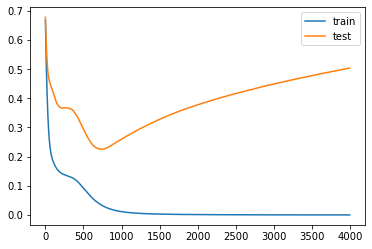

In [17]:
# plot training history with respect to loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

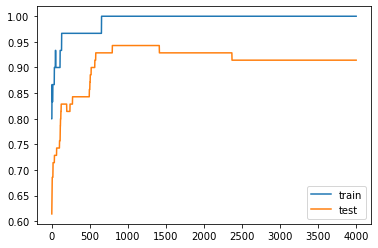

In [18]:
# plot training history with respect to accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## 6.3. Overfit MLP with Early Stopping - 1

In [19]:
# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [20]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [21]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [22]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [24]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=1, callbacks=[es])

Train on 30 samples, validate on 70 samples
Epoch 1/4000
30/30 [==============================] - 0s 5ms/step - loss: 0.7106 - accuracy: 0.1333 - val_loss: 0.6992 - val_accuracy: 0.3571
Epoch 2/4000
30/30 [==============================] - 0s 333us/step - loss: 0.6929 - accuracy: 0.5667 - val_loss: 0.6875 - val_accuracy: 0.6143
Epoch 3/4000
30/30 [==============================] - 0s 367us/step - loss: 0.6757 - accuracy: 0.8667 - val_loss: 0.6762 - val_accuracy: 0.6286
Epoch 4/4000
30/30 [==============================] - 0s 333us/step - loss: 0.6590 - accuracy: 0.8333 - val_loss: 0.6653 - val_accuracy: 0.6714
Epoch 5/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6428 - accuracy: 0.8333 - val_loss: 0.6552 - val_accuracy: 0.6857
Epoch 6/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6278 - accuracy: 0.8333 - val_loss: 0.6451 - val_accuracy: 0.6857
Epoch 7/4000
30/30 [==============================] - 0s 300us/step - loss: 0.6126 - accuracy:

Epoch 58/4000
30/30 [==============================] - 0s 300us/step - loss: 0.2439 - accuracy: 0.9000 - val_loss: 0.4533 - val_accuracy: 0.7286
Epoch 59/4000
30/30 [==============================] - 0s 200us/step - loss: 0.2415 - accuracy: 0.9000 - val_loss: 0.4526 - val_accuracy: 0.7286
Epoch 60/4000
30/30 [==============================] - 0s 167us/step - loss: 0.2391 - accuracy: 0.9000 - val_loss: 0.4520 - val_accuracy: 0.7286
Epoch 61/4000
30/30 [==============================] - 0s 200us/step - loss: 0.2369 - accuracy: 0.9000 - val_loss: 0.4515 - val_accuracy: 0.7286
Epoch 62/4000
30/30 [==============================] - 0s 233us/step - loss: 0.2347 - accuracy: 0.9000 - val_loss: 0.4509 - val_accuracy: 0.7286
Epoch 63/4000
30/30 [==============================] - 0s 167us/step - loss: 0.2326 - accuracy: 0.9000 - val_loss: 0.4503 - val_accuracy: 0.7286
Epoch 64/4000
30/30 [==============================] - 0s 200us/step - loss: 0.2305 - accuracy: 0.9000 - val_loss: 0.4498 - val_ac

Epoch 115/4000
30/30 [==============================] - 0s 300us/step - loss: 0.1788 - accuracy: 0.9333 - val_loss: 0.4200 - val_accuracy: 0.7571
Epoch 116/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1782 - accuracy: 0.9333 - val_loss: 0.4192 - val_accuracy: 0.7571
Epoch 117/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1776 - accuracy: 0.9333 - val_loss: 0.4184 - val_accuracy: 0.7571
Epoch 118/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1771 - accuracy: 0.9333 - val_loss: 0.4176 - val_accuracy: 0.7571
Epoch 119/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1765 - accuracy: 0.9333 - val_loss: 0.4169 - val_accuracy: 0.7571
Epoch 120/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1759 - accuracy: 0.9333 - val_loss: 0.4161 - val_accuracy: 0.7714
Epoch 121/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1754 - accuracy: 0.9333 - val_loss: 0.4153 -

Epoch 172/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1535 - accuracy: 0.9667 - val_loss: 0.3821 - val_accuracy: 0.8286
Epoch 173/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1532 - accuracy: 0.9667 - val_loss: 0.3817 - val_accuracy: 0.8286
Epoch 174/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1528 - accuracy: 0.9667 - val_loss: 0.3813 - val_accuracy: 0.8286
Epoch 175/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1525 - accuracy: 0.9667 - val_loss: 0.3809 - val_accuracy: 0.8286
Epoch 176/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1522 - accuracy: 0.9667 - val_loss: 0.3805 - val_accuracy: 0.8286
Epoch 177/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1519 - accuracy: 0.9667 - val_loss: 0.3801 - val_accuracy: 0.8286
Epoch 178/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1516 - accuracy: 0.9667 - val_loss: 0.3797 -

Epoch 00228: early stopping


In [25]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.814


In [26]:
history.history;

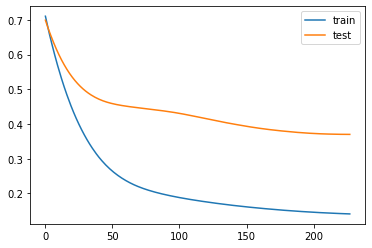

In [27]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## 6.4. Overfit MLP with Early Stopping - 2 patience

In [28]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [29]:
# define model acc=0.943(e.g.)
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# # another way to define a modelacc=0.943 (e.g.)
# model = Sequential()
# model.add(Dense(500, input_dim=2, activation='relu'))
# model.add(Dense(2, activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [32]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=1, callbacks=[es])

Train on 30 samples, validate on 70 samples
Epoch 1/4000
30/30 [==============================] - 0s 6ms/step - loss: 0.6668 - accuracy: 0.8667 - val_loss: 0.6653 - val_accuracy: 0.7143
Epoch 2/4000
30/30 [==============================] - 0s 576us/step - loss: 0.6507 - accuracy: 0.9000 - val_loss: 0.6550 - val_accuracy: 0.7143
Epoch 3/4000
30/30 [==============================] - 0s 266us/step - loss: 0.6350 - accuracy: 0.9000 - val_loss: 0.6451 - val_accuracy: 0.7000
Epoch 4/4000
30/30 [==============================] - 0s 200us/step - loss: 0.6197 - accuracy: 0.8667 - val_loss: 0.6361 - val_accuracy: 0.7143
Epoch 5/4000
30/30 [==============================] - 0s 267us/step - loss: 0.6058 - accuracy: 0.8667 - val_loss: 0.6269 - val_accuracy: 0.7143
Epoch 6/4000
30/30 [==============================] - 0s 300us/step - loss: 0.5914 - accuracy: 0.8667 - val_loss: 0.6181 - val_accuracy: 0.7143
Epoch 7/4000
30/30 [==============================] - 0s 200us/step - loss: 0.5774 - accuracy:

Epoch 58/4000
30/30 [==============================] - 0s 200us/step - loss: 0.2346 - accuracy: 0.9000 - val_loss: 0.4485 - val_accuracy: 0.7429
Epoch 59/4000
30/30 [==============================] - 0s 200us/step - loss: 0.2324 - accuracy: 0.9000 - val_loss: 0.4477 - val_accuracy: 0.7429
Epoch 60/4000
30/30 [==============================] - 0s 233us/step - loss: 0.2303 - accuracy: 0.9000 - val_loss: 0.4470 - val_accuracy: 0.7429
Epoch 61/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2282 - accuracy: 0.9000 - val_loss: 0.4463 - val_accuracy: 0.7429
Epoch 62/4000
30/30 [==============================] - 0s 200us/step - loss: 0.2263 - accuracy: 0.9000 - val_loss: 0.4456 - val_accuracy: 0.7429
Epoch 63/4000
30/30 [==============================] - 0s 200us/step - loss: 0.2244 - accuracy: 0.9000 - val_loss: 0.4449 - val_accuracy: 0.7429
Epoch 64/4000
30/30 [==============================] - 0s 267us/step - loss: 0.2226 - accuracy: 0.9000 - val_loss: 0.4442 - val_ac

Epoch 115/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1751 - accuracy: 0.9333 - val_loss: 0.4095 - val_accuracy: 0.8000
Epoch 116/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1745 - accuracy: 0.9333 - val_loss: 0.4088 - val_accuracy: 0.8000
Epoch 117/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1740 - accuracy: 0.9333 - val_loss: 0.4080 - val_accuracy: 0.8000
Epoch 118/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1734 - accuracy: 0.9333 - val_loss: 0.4073 - val_accuracy: 0.8000
Epoch 119/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1729 - accuracy: 0.9333 - val_loss: 0.4065 - val_accuracy: 0.8000
Epoch 120/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1724 - accuracy: 0.9333 - val_loss: 0.4058 - val_accuracy: 0.8000
Epoch 121/4000
30/30 [==============================] - 0s 234us/step - loss: 0.1718 - accuracy: 0.9333 - val_loss: 0.4050 -

Epoch 172/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1513 - accuracy: 0.9667 - val_loss: 0.3746 - val_accuracy: 0.8286
Epoch 173/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1510 - accuracy: 0.9667 - val_loss: 0.3743 - val_accuracy: 0.8286
Epoch 174/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1507 - accuracy: 0.9667 - val_loss: 0.3740 - val_accuracy: 0.8286
Epoch 175/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1505 - accuracy: 0.9667 - val_loss: 0.3736 - val_accuracy: 0.8286
Epoch 176/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1502 - accuracy: 0.9667 - val_loss: 0.3733 - val_accuracy: 0.8286
Epoch 177/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1499 - accuracy: 0.9667 - val_loss: 0.3730 - val_accuracy: 0.8286
Epoch 178/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1497 - accuracy: 0.9667 - val_loss: 0.3727 -

Epoch 229/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1406 - accuracy: 0.9667 - val_loss: 0.3682 - val_accuracy: 0.8143
Epoch 230/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1404 - accuracy: 0.9667 - val_loss: 0.3681 - val_accuracy: 0.8143
Epoch 231/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1403 - accuracy: 0.9667 - val_loss: 0.3681 - val_accuracy: 0.8143
Epoch 232/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1402 - accuracy: 0.9667 - val_loss: 0.3681 - val_accuracy: 0.8143
Epoch 233/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1401 - accuracy: 0.9667 - val_loss: 0.3681 - val_accuracy: 0.8143
Epoch 234/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1399 - accuracy: 0.9667 - val_loss: 0.3681 - val_accuracy: 0.8143
Epoch 235/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1398 - accuracy: 0.9667 - val_loss: 0.3681 -

Epoch 286/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1343 - accuracy: 0.9667 - val_loss: 0.3677 - val_accuracy: 0.8429
Epoch 287/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1342 - accuracy: 0.9667 - val_loss: 0.3677 - val_accuracy: 0.8429
Epoch 288/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1341 - accuracy: 0.9667 - val_loss: 0.3677 - val_accuracy: 0.8429
Epoch 289/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1340 - accuracy: 0.9667 - val_loss: 0.3677 - val_accuracy: 0.8429
Epoch 290/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1339 - accuracy: 0.9667 - val_loss: 0.3677 - val_accuracy: 0.8429
Epoch 291/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1338 - accuracy: 0.9667 - val_loss: 0.3676 - val_accuracy: 0.8429
Epoch 292/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1337 - accuracy: 0.9667 - val_loss: 0.3676 -

Epoch 343/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1284 - accuracy: 0.9667 - val_loss: 0.3639 - val_accuracy: 0.8429
Epoch 344/4000
30/30 [==============================] - 0s 333us/step - loss: 0.1283 - accuracy: 0.9667 - val_loss: 0.3637 - val_accuracy: 0.8429
Epoch 345/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1282 - accuracy: 0.9667 - val_loss: 0.3636 - val_accuracy: 0.8429
Epoch 346/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1281 - accuracy: 0.9667 - val_loss: 0.3635 - val_accuracy: 0.8429
Epoch 347/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1279 - accuracy: 0.9667 - val_loss: 0.3634 - val_accuracy: 0.8429
Epoch 348/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1278 - accuracy: 0.9667 - val_loss: 0.3633 - val_accuracy: 0.8429
Epoch 349/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1277 - accuracy: 0.9667 - val_loss: 0.3632 -

Epoch 400/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1212 - accuracy: 0.9667 - val_loss: 0.3537 - val_accuracy: 0.8429
Epoch 401/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1211 - accuracy: 0.9667 - val_loss: 0.3533 - val_accuracy: 0.8429
Epoch 402/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1209 - accuracy: 0.9667 - val_loss: 0.3530 - val_accuracy: 0.8429
Epoch 403/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1207 - accuracy: 0.9667 - val_loss: 0.3526 - val_accuracy: 0.8429
Epoch 404/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1206 - accuracy: 0.9667 - val_loss: 0.3523 - val_accuracy: 0.8429
Epoch 405/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1204 - accuracy: 0.9667 - val_loss: 0.3519 - val_accuracy: 0.8429
Epoch 406/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1203 - accuracy: 0.9667 - val_loss: 0.3515 -

Epoch 457/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1101 - accuracy: 0.9667 - val_loss: 0.3352 - val_accuracy: 0.8429
Epoch 458/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1099 - accuracy: 0.9667 - val_loss: 0.3349 - val_accuracy: 0.8429
Epoch 459/4000
30/30 [==============================] - 0s 267us/step - loss: 0.1096 - accuracy: 0.9667 - val_loss: 0.3345 - val_accuracy: 0.8429
Epoch 460/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1094 - accuracy: 0.9667 - val_loss: 0.3342 - val_accuracy: 0.8429
Epoch 461/4000
30/30 [==============================] - 0s 233us/step - loss: 0.1092 - accuracy: 0.9667 - val_loss: 0.3338 - val_accuracy: 0.8429
Epoch 462/4000
30/30 [==============================] - 0s 200us/step - loss: 0.1090 - accuracy: 0.9667 - val_loss: 0.3334 - val_accuracy: 0.8429
Epoch 463/4000
30/30 [==============================] - 0s 167us/step - loss: 0.1087 - accuracy: 0.9667 - val_loss: 0.3330 -

Epoch 514/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0964 - accuracy: 0.9667 - val_loss: 0.3105 - val_accuracy: 0.8429
Epoch 515/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0962 - accuracy: 0.9667 - val_loss: 0.3101 - val_accuracy: 0.8429
Epoch 516/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0959 - accuracy: 0.9667 - val_loss: 0.3096 - val_accuracy: 0.8429
Epoch 517/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0957 - accuracy: 0.9667 - val_loss: 0.3091 - val_accuracy: 0.8429
Epoch 518/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0954 - accuracy: 0.9667 - val_loss: 0.3086 - val_accuracy: 0.8429
Epoch 519/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0952 - accuracy: 0.9667 - val_loss: 0.3080 - val_accuracy: 0.8429
Epoch 520/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0949 - accuracy: 0.9667 - val_loss: 0.3076 -

Epoch 571/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0814 - accuracy: 0.9667 - val_loss: 0.2840 - val_accuracy: 0.8857
Epoch 572/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0811 - accuracy: 0.9667 - val_loss: 0.2836 - val_accuracy: 0.8857
Epoch 573/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0808 - accuracy: 0.9667 - val_loss: 0.2831 - val_accuracy: 0.8857
Epoch 574/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0806 - accuracy: 0.9667 - val_loss: 0.2827 - val_accuracy: 0.9000
Epoch 575/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0803 - accuracy: 0.9667 - val_loss: 0.2823 - val_accuracy: 0.9000
Epoch 576/4000
30/30 [==============================] - 0s 234us/step - loss: 0.0800 - accuracy: 0.9667 - val_loss: 0.2819 - val_accuracy: 0.9000
Epoch 577/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0798 - accuracy: 0.9667 - val_loss: 0.2815 -

Epoch 628/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0664 - accuracy: 0.9667 - val_loss: 0.2598 - val_accuracy: 0.9143
Epoch 629/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0662 - accuracy: 0.9667 - val_loss: 0.2594 - val_accuracy: 0.9143
Epoch 630/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0659 - accuracy: 0.9667 - val_loss: 0.2589 - val_accuracy: 0.9143
Epoch 631/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0657 - accuracy: 0.9667 - val_loss: 0.2586 - val_accuracy: 0.9286
Epoch 632/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0654 - accuracy: 0.9667 - val_loss: 0.2582 - val_accuracy: 0.9286
Epoch 633/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0651 - accuracy: 0.9667 - val_loss: 0.2580 - val_accuracy: 0.9286
Epoch 634/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0649 - accuracy: 0.9667 - val_loss: 0.2577 -

Epoch 685/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0528 - accuracy: 0.9667 - val_loss: 0.2429 - val_accuracy: 0.9286
Epoch 686/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0525 - accuracy: 0.9667 - val_loss: 0.2426 - val_accuracy: 0.9286
Epoch 687/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0523 - accuracy: 0.9667 - val_loss: 0.2424 - val_accuracy: 0.9286
Epoch 688/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0521 - accuracy: 0.9667 - val_loss: 0.2422 - val_accuracy: 0.9286
Epoch 689/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0519 - accuracy: 0.9667 - val_loss: 0.2420 - val_accuracy: 0.9286
Epoch 690/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0517 - accuracy: 0.9667 - val_loss: 0.2417 - val_accuracy: 0.9286
Epoch 691/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0515 - accuracy: 0.9667 - val_loss: 0.2415 -

Epoch 742/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.2330 - val_accuracy: 0.9286
Epoch 743/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.2329 - val_accuracy: 0.9286
Epoch 744/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0412 - accuracy: 1.0000 - val_loss: 0.2329 - val_accuracy: 0.9286
Epoch 745/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0410 - accuracy: 1.0000 - val_loss: 0.2328 - val_accuracy: 0.9286
Epoch 746/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 0.2327 - val_accuracy: 0.9286
Epoch 747/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 0.2325 - val_accuracy: 0.9286
Epoch 748/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.2324 -

Epoch 799/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9286
Epoch 800/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9286
Epoch 801/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0325 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9286
Epoch 802/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9286
Epoch 803/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9286
Epoch 804/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9286
Epoch 805/4000
30/30 [==============================] - 0s 300us/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.2302 -

Epoch 856/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9286
Epoch 857/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9286
Epoch 858/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.2334 - val_accuracy: 0.9286
Epoch 859/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.2335 - val_accuracy: 0.9286
Epoch 860/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.2336 - val_accuracy: 0.9286
Epoch 861/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.2337 - val_accuracy: 0.9286
Epoch 862/4000
30/30 [==============================] - 0s 333us/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.2338 -

Epoch 913/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.2407 - val_accuracy: 0.9429
Epoch 914/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.2408 - val_accuracy: 0.9429
Epoch 915/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.2410 - val_accuracy: 0.9429
Epoch 916/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.2411 - val_accuracy: 0.9429
Epoch 917/4000
30/30 [==============================] - 0s 500us/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.2413 - val_accuracy: 0.9429
Epoch 918/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.2414 - val_accuracy: 0.9429
Epoch 919/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.2416 -

Epoch 970/4000
30/30 [==============================] - 0s 167us/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.2500 - val_accuracy: 0.9429
Epoch 971/4000
30/30 [==============================] - 0s 300us/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.2502 - val_accuracy: 0.9429
Epoch 972/4000
30/30 [==============================] - 0s 200us/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.2503 - val_accuracy: 0.9429
Epoch 973/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.2505 - val_accuracy: 0.9429
Epoch 974/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.2506 - val_accuracy: 0.9429
Epoch 975/4000
30/30 [==============================] - 0s 233us/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.2508 - val_accuracy: 0.9429
Epoch 976/4000
30/30 [==============================] - 0s 267us/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.2509 -

In [33]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.943


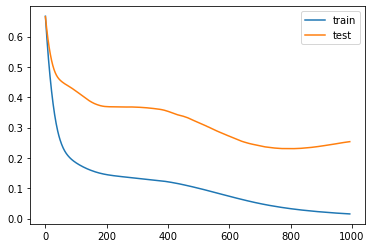

In [34]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## 6.5. Overfit MLP with Early Stopping - 3, ModelCheckpoint

In [35]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model

In [37]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [38]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [39]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.48571, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.48571 to 0.65714, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.65714 to 0.68571, saving model to best_model.h5

Epoch 00004: val_accuracy did not improve from 0.68571

Epoch 00005: val_accuracy did not improve from 0.68571

Epoch 00006: val_accuracy did not improve from 0.68571

Epoch 00007: val_accuracy did not improve from 0.68571

Epoch 00008: val_accuracy did not improve from 0.68571

Epoch 00009: val_accuracy did not improve from 0.68571

Epoch 00010: val_accuracy did not improve from 0.68571

Epoch 00011: val_accuracy did not improve from 0.68571

Epoch 00012: val_accuracy did not improve from 0.68571

Epoch 00013: val_accuracy did not improve from 0.68571

Epoch 00014: val_accuracy did not improve from 0.68571

Epoch 00015: val_accuracy improved from 0.68571 to 0.71429, saving model to best_model.h5

Epoch 00016: val_accur

Epoch 00145: val_accuracy did not improve from 0.82857

Epoch 00146: val_accuracy did not improve from 0.82857

Epoch 00147: val_accuracy did not improve from 0.82857

Epoch 00148: val_accuracy did not improve from 0.82857

Epoch 00149: val_accuracy did not improve from 0.82857

Epoch 00150: val_accuracy did not improve from 0.82857

Epoch 00151: val_accuracy did not improve from 0.82857

Epoch 00152: val_accuracy did not improve from 0.82857

Epoch 00153: val_accuracy did not improve from 0.82857

Epoch 00154: val_accuracy did not improve from 0.82857

Epoch 00155: val_accuracy did not improve from 0.82857

Epoch 00156: val_accuracy did not improve from 0.82857

Epoch 00157: val_accuracy did not improve from 0.82857

Epoch 00158: val_accuracy did not improve from 0.82857

Epoch 00159: val_accuracy did not improve from 0.82857

Epoch 00160: val_accuracy did not improve from 0.82857

Epoch 00161: val_accuracy did not improve from 0.82857

Epoch 00162: val_accuracy did not improve from 0

Epoch 00301: val_accuracy did not improve from 0.84286

Epoch 00302: val_accuracy did not improve from 0.84286

Epoch 00303: val_accuracy did not improve from 0.84286

Epoch 00304: val_accuracy did not improve from 0.84286

Epoch 00305: val_accuracy did not improve from 0.84286

Epoch 00306: val_accuracy did not improve from 0.84286

Epoch 00307: val_accuracy did not improve from 0.84286

Epoch 00308: val_accuracy did not improve from 0.84286

Epoch 00309: val_accuracy did not improve from 0.84286

Epoch 00310: val_accuracy did not improve from 0.84286

Epoch 00311: val_accuracy did not improve from 0.84286

Epoch 00312: val_accuracy did not improve from 0.84286

Epoch 00313: val_accuracy did not improve from 0.84286

Epoch 00314: val_accuracy did not improve from 0.84286

Epoch 00315: val_accuracy did not improve from 0.84286

Epoch 00316: val_accuracy did not improve from 0.84286

Epoch 00317: val_accuracy did not improve from 0.84286

Epoch 00318: val_accuracy did not improve from 0

Epoch 00464: val_accuracy did not improve from 0.84286

Epoch 00465: val_accuracy did not improve from 0.84286

Epoch 00466: val_accuracy did not improve from 0.84286

Epoch 00467: val_accuracy did not improve from 0.84286

Epoch 00468: val_accuracy did not improve from 0.84286

Epoch 00469: val_accuracy did not improve from 0.84286

Epoch 00470: val_accuracy did not improve from 0.84286

Epoch 00471: val_accuracy did not improve from 0.84286

Epoch 00472: val_accuracy did not improve from 0.84286

Epoch 00473: val_accuracy did not improve from 0.84286

Epoch 00474: val_accuracy did not improve from 0.84286

Epoch 00475: val_accuracy did not improve from 0.84286

Epoch 00476: val_accuracy did not improve from 0.84286

Epoch 00477: val_accuracy did not improve from 0.84286

Epoch 00478: val_accuracy did not improve from 0.84286

Epoch 00479: val_accuracy did not improve from 0.84286

Epoch 00480: val_accuracy did not improve from 0.84286

Epoch 00481: val_accuracy did not improve from 0

Epoch 00611: val_accuracy did not improve from 0.90000

Epoch 00612: val_accuracy did not improve from 0.90000

Epoch 00613: val_accuracy did not improve from 0.90000

Epoch 00614: val_accuracy did not improve from 0.90000

Epoch 00615: val_accuracy improved from 0.90000 to 0.91429, saving model to best_model.h5

Epoch 00616: val_accuracy did not improve from 0.91429

Epoch 00617: val_accuracy improved from 0.91429 to 0.92857, saving model to best_model.h5

Epoch 00618: val_accuracy did not improve from 0.92857

Epoch 00619: val_accuracy did not improve from 0.92857

Epoch 00620: val_accuracy did not improve from 0.92857

Epoch 00621: val_accuracy did not improve from 0.92857

Epoch 00622: val_accuracy did not improve from 0.92857

Epoch 00623: val_accuracy did not improve from 0.92857

Epoch 00624: val_accuracy did not improve from 0.92857

Epoch 00625: val_accuracy did not improve from 0.92857

Epoch 00626: val_accuracy did not improve from 0.92857

Epoch 00627: val_accuracy did not 

Epoch 00760: val_accuracy did not improve from 0.92857

Epoch 00761: val_accuracy did not improve from 0.92857

Epoch 00762: val_accuracy did not improve from 0.92857

Epoch 00763: val_accuracy did not improve from 0.92857

Epoch 00764: val_accuracy did not improve from 0.92857

Epoch 00765: val_accuracy did not improve from 0.92857

Epoch 00766: val_accuracy did not improve from 0.92857

Epoch 00767: val_accuracy did not improve from 0.92857

Epoch 00768: val_accuracy did not improve from 0.92857

Epoch 00769: val_accuracy did not improve from 0.92857

Epoch 00770: val_accuracy did not improve from 0.92857

Epoch 00771: val_accuracy did not improve from 0.92857

Epoch 00772: val_accuracy did not improve from 0.92857

Epoch 00773: val_accuracy did not improve from 0.92857

Epoch 00774: val_accuracy did not improve from 0.92857

Epoch 00775: val_accuracy did not improve from 0.92857

Epoch 00776: val_accuracy did not improve from 0.92857

Epoch 00777: val_accuracy did not improve from 0

Epoch 00906: val_accuracy did not improve from 0.94286

Epoch 00907: val_accuracy did not improve from 0.94286

Epoch 00908: val_accuracy did not improve from 0.94286

Epoch 00909: val_accuracy did not improve from 0.94286

Epoch 00910: val_accuracy did not improve from 0.94286

Epoch 00911: val_accuracy did not improve from 0.94286

Epoch 00912: val_accuracy did not improve from 0.94286

Epoch 00913: val_accuracy did not improve from 0.94286

Epoch 00914: val_accuracy did not improve from 0.94286

Epoch 00915: val_accuracy did not improve from 0.94286

Epoch 00916: val_accuracy did not improve from 0.94286

Epoch 00917: val_accuracy did not improve from 0.94286

Epoch 00918: val_accuracy did not improve from 0.94286

Epoch 00919: val_accuracy did not improve from 0.94286

Epoch 00920: val_accuracy did not improve from 0.94286

Epoch 00921: val_accuracy did not improve from 0.94286

Epoch 00922: val_accuracy did not improve from 0.94286

Epoch 00923: val_accuracy did not improve from 0

In [40]:
# load the saved model
saved_model = load_model('best_model.h5')

In [41]:
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.943
